# Recommender Systems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
with open('movie_ids.txt', 'r', errors='ignore') as file:
    f = file.readlines()
movieList = {}
for item in f:
    i = item.split(maxsplit=1)
    index = int(i[0])-1
    word = i[1][:-1]
    movieList[index] = word

movieList

{0: 'Toy Story (1995)',
 1: 'GoldenEye (1995)',
 2: 'Four Rooms (1995)',
 3: 'Get Shorty (1995)',
 4: 'Copycat (1995)',
 5: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 6: 'Twelve Monkeys (1995)',
 7: 'Babe (1995)',
 8: 'Dead Man Walking (1995)',
 9: 'Richard III (1995)',
 10: 'Seven (Se7en) (1995)',
 11: 'Usual Suspects, The (1995)',
 12: 'Mighty Aphrodite (1995)',
 13: 'Postino, Il (1994)',
 14: "Mr. Holland's Opus (1995)",
 15: 'French Twist (Gazon maudit) (1995)',
 16: 'From Dusk Till Dawn (1996)',
 17: 'White Balloon, The (1995)',
 18: "Antonia's Line (1995)",
 19: 'Angels and Insects (1995)',
 20: 'Muppet Treasure Island (1996)',
 21: 'Braveheart (1995)',
 22: 'Taxi Driver (1976)',
 23: 'Rumble in the Bronx (1995)',
 24: 'Birdcage, The (1996)',
 25: 'Brothers McMullen, The (1995)',
 26: 'Bad Boys (1995)',
 27: 'Apollo 13 (1995)',
 28: 'Batman Forever (1995)',
 29: 'Belle de jour (1967)',
 30: 'Crimson Tide (1995)',
 31: 'Crumb (1994)',
 32: 'Desperado (1995)',
 33: 'D

In [3]:
data = pd.read_table('ex8_movies.txt', sep=',', header=None, dtype=np.float32)
data

,0,1,2,3,4,5,6,7,8,9,...,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
Y = data.iloc[:,:943].values
R = data.iloc[:,943:].values

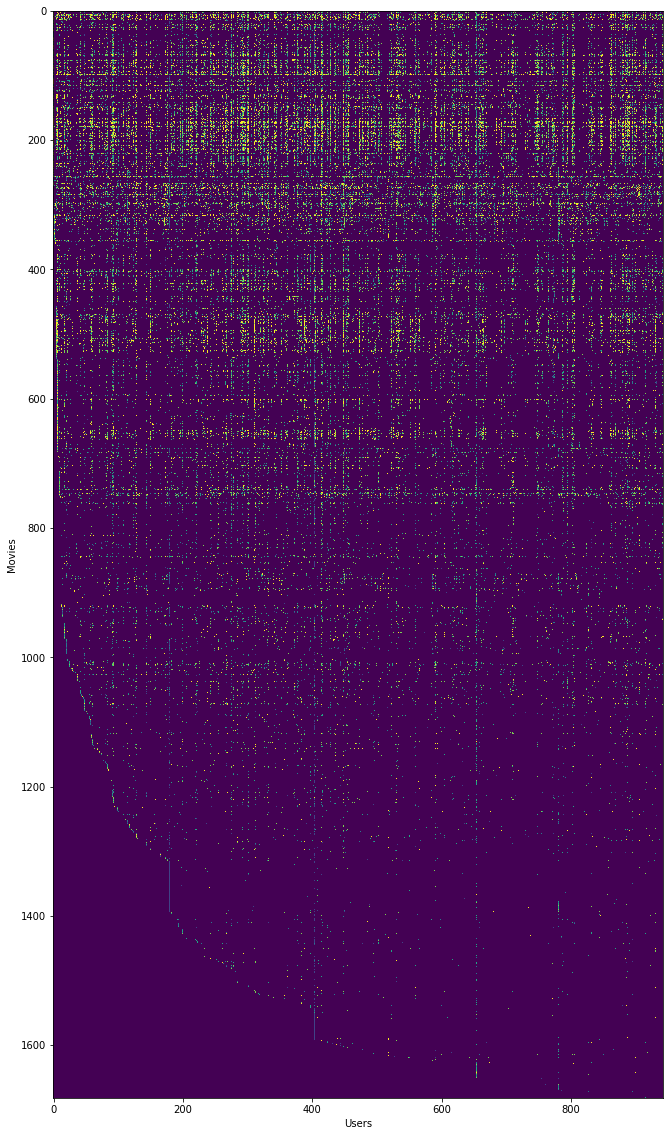

In [5]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Users')
ax.set_ylabel('Movies')
ax.imshow(Y)

In [6]:
my_ratings = np.zeros((1682, 1))
my_ratings[0] = 4.0
my_ratings[97] = 2.0
my_ratings[6] = 3.0
my_ratings[11] = 5.0
my_ratings[53] = 4.0
my_ratings[63] = 5.0
my_ratings[65] = 3.0
my_ratings[68] = 5.0
my_ratings[182] = 4.0
my_ratings[225] = 5.0
my_ratings[354] = 5.0

Y = np.concatenate((my_ratings, Y), axis=1)
R = np.concatenate((my_ratings != 0, R), axis=1)

print('New user ratings:')
for i in [0,97,6,11,53,63,65,68,182,225,354]:
    print('Rated {} for {}'.format(my_ratings[i,0], movieList[i]))

New user ratings:
Rated 4.0 for Toy Story (1995)
Rated 2.0 for Silence of the Lambs, The (1991)
Rated 3.0 for Twelve Monkeys (1995)
Rated 5.0 for Usual Suspects, The (1995)
Rated 4.0 for Outbreak (1995)
Rated 5.0 for Shawshank Redemption, The (1994)
Rated 3.0 for While You Were Sleeping (1995)
Rated 5.0 for Forrest Gump (1994)
Rated 4.0 for Alien (1979)
Rated 5.0 for Die Hard 2 (1990)
Rated 5.0 for Sphere (1998)


In [7]:
class RecommenderSystem():
    
    def __init__(self, num_features):
        self.num_features = num_features
        
    def __call__(self, inputs):
        x = inputs[0]
        theta = inputs[1]
        return self.ratings[x,theta]
        
    def predict(self, inputs):
        return self(inputs)
   
    def costFunc(self, Y, R):
        X = self.weights[:self.num_movies*self.num_features].reshape((self.num_movies, self.num_features))
        Theta = self.weights[self.num_movies*self.num_features:].reshape((self.num_users, self.num_features))
        Z = np.dot(X,Theta.T) - Y
        M = Z*Z
        N = Theta*Theta
        L = X*X
        J = (1/2)*np.sum(np.sum(R*M)) + (self.alpha/2)*np.sum(np.sum(N)) + (self.alpha/2)*np.sum(np.sum(L))
        return J
    
    def gradFunc(self, Y, R):
        X = self.weights[:self.num_movies*self.num_features].reshape((self.num_movies, self.num_features))
        Theta = self.weights[self.num_movies*self.num_features:].reshape((self.num_users, self.num_features))
        Z = np.dot(X,Theta.T) - Y
        W = Z*R
        X_grad = np.dot(W,Theta) + self.alpha*X
        Theta_grad = np.dot(X.T,W).T + self.alpha*Theta
        grad = np.concatenate((X_grad.flatten(), Theta_grad.flatten())).reshape((1,-1))
        return grad.flatten()
                      
    def fit(self, Y, R, epochs=10000, learning_rate=0.0001, alpha=10.):
        self.num_movies = Y.shape[0]
        self.num_users = Y.shape[1]
        self.alpha = alpha
        self.X = np.random.rand(self.num_movies,self.num_features)
        self.Theta = np.random.rand(self.num_users,self.num_features)
        self.ratings = np.dot(self.X,self.Theta.T)
        self.weights = np.concatenate((self.X.flatten(), self.Theta.flatten()))
        print('Training...')
        for epoch in range(epochs):
            start_time = time.time()
            grads = self.gradFunc(Y, R)
            self.weights = self.weights - learning_rate*grads
            loss = self.costFunc(Y, R) 
            now = time.time()
            duration = now - start_time
            print('Epochs {}/{} - Loss: {}'.format(epoch+1, epochs, loss))
            print('----- {}s -----'.format(np.round(1000*duration)/1000))
        self.X = self.weights[:self.num_movies*self.num_features].reshape((self.num_movies, self.num_features))
        self.Theta = self.weights[self.num_movies*self.num_features:].reshape((self.num_users, self.num_features))
        self.ratings = np.dot(self.X,self.Theta.T)

In [8]:
model = RecommenderSystem(num_features=10)

model.fit(Y, R)

Training...
Epochs 1/10000 - Loss: 171399.73112933236
----- 0.052s -----
Epochs 2/10000 - Loss: 161367.5478470793
----- 0.03s -----
Epochs 3/10000 - Loss: 152891.0952553208
----- 0.03s -----
Epochs 4/10000 - Loss: 145741.39425399684
----- 0.029s -----
Epochs 5/10000 - Loss: 139713.21098886055
----- 0.031s -----
Epochs 6/10000 - Loss: 134625.8513596719
----- 0.04s -----
Epochs 7/10000 - Loss: 130322.86774407749
----- 0.035s -----
Epochs 8/10000 - Loss: 126670.81666992401
----- 0.031s -----
Epochs 9/10000 - Loss: 123557.3324516542
----- 0.031s -----
Epochs 10/10000 - Loss: 120888.80443577262
----- 0.03s -----
Epochs 11/10000 - Loss: 118587.90929548726
----- 0.029s -----
Epochs 12/10000 - Loss: 116591.18857832073
----- 0.041s -----
Epochs 13/10000 - Loss: 114846.79735681118
----- 0.041s -----
Epochs 14/10000 - Loss: 113312.49416333149
----- 0.032s -----
Epochs 15/10000 - Loss: 111953.8999669164
----- 0.031s -----
Epochs 16/10000 - Loss: 110743.02492255918
----- 0.032s -----
Epochs 17/1000

Epochs 136/10000 - Loss: 89248.57438269455
----- 0.04s -----
Epochs 137/10000 - Loss: 89202.74499670352
----- 0.037s -----
Epochs 138/10000 - Loss: 89157.30422897247
----- 0.037s -----
Epochs 139/10000 - Loss: 89112.24549665047
----- 0.038s -----
Epochs 140/10000 - Loss: 89067.56238517932
----- 0.036s -----
Epochs 141/10000 - Loss: 89023.24864269147
----- 0.036s -----
Epochs 142/10000 - Loss: 88979.29817463428
----- 0.038s -----
Epochs 143/10000 - Loss: 88935.7050386092
----- 0.036s -----
Epochs 144/10000 - Loss: 88892.46343941685
----- 0.035s -----
Epochs 145/10000 - Loss: 88849.56772429704
----- 0.037s -----
Epochs 146/10000 - Loss: 88807.01237835648
----- 0.039s -----
Epochs 147/10000 - Loss: 88764.79202017306
----- 0.037s -----
Epochs 148/10000 - Loss: 88722.90139757196
----- 0.039s -----
Epochs 149/10000 - Loss: 88681.33538356257
----- 0.036s -----
Epochs 150/10000 - Loss: 88640.08897243172
----- 0.038s -----
Epochs 151/10000 - Loss: 88599.1572759836
----- 0.037s -----
Epochs 152/

Epochs 271/10000 - Loss: 85128.64869303996
----- 0.039s -----
Epochs 272/10000 - Loss: 85107.54414161647
----- 0.04s -----
Epochs 273/10000 - Loss: 85086.5263361007
----- 0.04s -----
Epochs 274/10000 - Loss: 85065.59461675445
----- 0.037s -----
Epochs 275/10000 - Loss: 85044.74833121103
----- 0.037s -----
Epochs 276/10000 - Loss: 85023.98683435672
----- 0.036s -----
Epochs 277/10000 - Loss: 85003.3094882145
----- 0.04s -----
Epochs 278/10000 - Loss: 84982.71566183018
----- 0.037s -----
Epochs 279/10000 - Loss: 84962.20473116037
----- 0.037s -----
Epochs 280/10000 - Loss: 84941.77607896397
----- 0.035s -----
Epochs 281/10000 - Loss: 84921.42909469386
----- 0.035s -----
Epochs 282/10000 - Loss: 84901.16317439223
----- 0.034s -----
Epochs 283/10000 - Loss: 84880.97772058778
----- 0.036s -----
Epochs 284/10000 - Loss: 84860.87214219398
----- 0.037s -----
Epochs 285/10000 - Loss: 84840.84585441061
----- 0.035s -----
Epochs 286/10000 - Loss: 84820.8982786261
----- 0.034s -----
Epochs 287/100

Epochs 404/10000 - Loss: 82895.43237594415
----- 0.038s -----
Epochs 405/10000 - Loss: 82881.92832013968
----- 0.034s -----
Epochs 406/10000 - Loss: 82868.46075181037
----- 0.034s -----
Epochs 407/10000 - Loss: 82855.0294553084
----- 0.034s -----
Epochs 408/10000 - Loss: 82841.6342163305
----- 0.035s -----
Epochs 409/10000 - Loss: 82828.27482190463
----- 0.036s -----
Epochs 410/10000 - Loss: 82814.95106037725
----- 0.04s -----
Epochs 411/10000 - Loss: 82801.66272140003
----- 0.041s -----
Epochs 412/10000 - Loss: 82788.40959591733
----- 0.039s -----
Epochs 413/10000 - Loss: 82775.19147615353
----- 0.039s -----
Epochs 414/10000 - Loss: 82762.0081556006
----- 0.037s -----
Epochs 415/10000 - Loss: 82748.85942900604
----- 0.033s -----
Epochs 416/10000 - Loss: 82735.74509236052
----- 0.037s -----
Epochs 417/10000 - Loss: 82722.66494288643
----- 0.034s -----
Epochs 418/10000 - Loss: 82709.61877902562
----- 0.034s -----
Epochs 419/10000 - Loss: 82696.60640042822
----- 0.033s -----
Epochs 420/1

Epochs 541/10000 - Loss: 81309.98988819719
----- 0.039s -----
Epochs 542/10000 - Loss: 81299.90436760006
----- 0.042s -----
Epochs 543/10000 - Loss: 81289.8345913533
----- 0.038s -----
Epochs 544/10000 - Loss: 81279.7804553585
----- 0.035s -----
Epochs 545/10000 - Loss: 81269.7418560499
----- 0.034s -----
Epochs 546/10000 - Loss: 81259.71869039255
----- 0.036s -----
Epochs 547/10000 - Loss: 81249.7108558809
----- 0.04s -----
Epochs 548/10000 - Loss: 81239.71825053728
----- 0.04s -----
Epochs 549/10000 - Loss: 81229.7407729103
----- 0.038s -----
Epochs 550/10000 - Loss: 81219.77832207369
----- 0.037s -----
Epochs 551/10000 - Loss: 81209.83079762466
----- 0.04s -----
Epochs 552/10000 - Loss: 81199.89809968269
----- 0.038s -----
Epochs 553/10000 - Loss: 81189.9801288881
----- 0.04s -----
Epochs 554/10000 - Loss: 81180.07678640091
----- 0.035s -----
Epochs 555/10000 - Loss: 81170.18797389934
----- 0.039s -----
Epochs 556/10000 - Loss: 81160.31359357893
----- 0.037s -----
Epochs 557/10000 -

Epochs 674/10000 - Loss: 80073.244535393
----- 0.046s -----
Epochs 675/10000 - Loss: 80064.53265936239
----- 0.042s -----
Epochs 676/10000 - Loss: 80055.82707759808
----- 0.043s -----
Epochs 677/10000 - Loss: 80047.12775197803
----- 0.045s -----
Epochs 678/10000 - Loss: 80038.43464487004
----- 0.049s -----
Epochs 679/10000 - Loss: 80029.74771913234
----- 0.044s -----
Epochs 680/10000 - Loss: 80021.06693811287
----- 0.04s -----
Epochs 681/10000 - Loss: 80012.3922656489
----- 0.043s -----
Epochs 682/10000 - Loss: 80003.72366606732
----- 0.038s -----
Epochs 683/10000 - Loss: 79995.06110418362
----- 0.046s -----
Epochs 684/10000 - Loss: 79986.40454530223
----- 0.046s -----
Epochs 685/10000 - Loss: 79977.75395521597
----- 0.044s -----
Epochs 686/10000 - Loss: 79969.10930020559
----- 0.043s -----
Epochs 687/10000 - Loss: 79960.47054703959
----- 0.042s -----
Epochs 688/10000 - Loss: 79951.83766297364
----- 0.04s -----
Epochs 689/10000 - Loss: 79943.21061575053
----- 0.039s -----
Epochs 690/10

Epochs 807/10000 - Loss: 78961.09001531774
----- 0.04s -----
Epochs 808/10000 - Loss: 78953.05853078197
----- 0.038s -----
Epochs 809/10000 - Loss: 78945.03219554028
----- 0.035s -----
Epochs 810/10000 - Loss: 78937.01102528992
----- 0.035s -----
Epochs 811/10000 - Loss: 78928.99503596342
----- 0.036s -----
Epochs 812/10000 - Loss: 78920.98424372493
----- 0.04s -----
Epochs 813/10000 - Loss: 78912.97866496662
----- 0.038s -----
Epochs 814/10000 - Loss: 78904.97831630491
----- 0.036s -----
Epochs 815/10000 - Loss: 78896.98321457703
----- 0.035s -----
Epochs 816/10000 - Loss: 78888.99337683708
----- 0.034s -----
Epochs 817/10000 - Loss: 78881.00882035267
----- 0.034s -----
Epochs 818/10000 - Loss: 78873.02956260079
----- 0.035s -----
Epochs 819/10000 - Loss: 78865.05562126463
----- 0.035s -----
Epochs 820/10000 - Loss: 78857.08701422953
----- 0.036s -----
Epochs 821/10000 - Loss: 78849.1237595792
----- 0.035s -----
Epochs 822/10000 - Loss: 78841.16587559234
----- 0.035s -----
Epochs 823/

Epochs 945/10000 - Loss: 77910.12063186133
----- 0.036s -----
Epochs 946/10000 - Loss: 77902.99607108116
----- 0.04s -----
Epochs 947/10000 - Loss: 77895.87951421444
----- 0.038s -----
Epochs 948/10000 - Loss: 77888.7709771772
----- 0.034s -----
Epochs 949/10000 - Loss: 77881.6704757154
----- 0.035s -----
Epochs 950/10000 - Loss: 77874.57802540396
----- 0.035s -----
Epochs 951/10000 - Loss: 77867.49364164598
----- 0.037s -----
Epochs 952/10000 - Loss: 77860.41733967159
----- 0.034s -----
Epochs 953/10000 - Loss: 77853.34913453706
----- 0.035s -----
Epochs 954/10000 - Loss: 77846.28904112394
----- 0.038s -----
Epochs 955/10000 - Loss: 77839.2370741385
----- 0.037s -----
Epochs 956/10000 - Loss: 77832.19324811039
----- 0.038s -----
Epochs 957/10000 - Loss: 77825.15757739243
----- 0.038s -----
Epochs 958/10000 - Loss: 77818.13007615946
----- 0.038s -----
Epochs 959/10000 - Loss: 77811.11075840784
----- 0.036s -----
Epochs 960/10000 - Loss: 77804.09963795483
----- 0.038s -----
Epochs 961/1

Epochs 1077/10000 - Loss: 77042.68007300922
----- 0.036s -----
Epochs 1078/10000 - Loss: 77036.6830540696
----- 0.038s -----
Epochs 1079/10000 - Loss: 77030.69463966636
----- 0.035s -----
Epochs 1080/10000 - Loss: 77024.71482457583
----- 0.036s -----
Epochs 1081/10000 - Loss: 77018.743603473
----- 0.035s -----
Epochs 1082/10000 - Loss: 77012.78097093233
----- 0.035s -----
Epochs 1083/10000 - Loss: 77006.82692142916
----- 0.034s -----
Epochs 1084/10000 - Loss: 77000.8814493408
----- 0.035s -----
Epochs 1085/10000 - Loss: 76994.94454894778
----- 0.034s -----
Epochs 1086/10000 - Loss: 76989.01621443481
----- 0.035s -----
Epochs 1087/10000 - Loss: 76983.09643989216
----- 0.034s -----
Epochs 1088/10000 - Loss: 76977.18521931673
----- 0.036s -----
Epochs 1089/10000 - Loss: 76971.28254661287
----- 0.035s -----
Epochs 1090/10000 - Loss: 76965.38841559412
----- 0.036s -----
Epochs 1091/10000 - Loss: 76959.50281998402
----- 0.035s -----
Epochs 1092/10000 - Loss: 76953.62575341712
----- 0.035s --

Epochs 1209/10000 - Loss: 76322.61481820344
----- 0.036s -----
Epochs 1210/10000 - Loss: 76317.6829613395
----- 0.035s -----
Epochs 1211/10000 - Loss: 76312.75851505963
----- 0.035s -----
Epochs 1212/10000 - Loss: 76307.84146870661
----- 0.034s -----
Epochs 1213/10000 - Loss: 76302.93181162333
----- 0.035s -----
Epochs 1214/10000 - Loss: 76298.02953315266
----- 0.036s -----
Epochs 1215/10000 - Loss: 76293.13462263811
----- 0.035s -----
Epochs 1216/10000 - Loss: 76288.24706942405
----- 0.035s -----
Epochs 1217/10000 - Loss: 76283.36686285606
----- 0.035s -----
Epochs 1218/10000 - Loss: 76278.49399228104
----- 0.035s -----
Epochs 1219/10000 - Loss: 76273.62844704778
----- 0.034s -----
Epochs 1220/10000 - Loss: 76268.770216507
----- 0.035s -----
Epochs 1221/10000 - Loss: 76263.91929001187
----- 0.036s -----
Epochs 1222/10000 - Loss: 76259.07565691798
----- 0.039s -----
Epochs 1223/10000 - Loss: 76254.23930658409
----- 0.035s -----
Epochs 1224/10000 - Loss: 76249.4102283718
----- 0.035s --

Epochs 1341/10000 - Loss: 75731.75803032736
----- 0.036s -----
Epochs 1342/10000 - Loss: 75727.71474994536
----- 0.035s -----
Epochs 1343/10000 - Loss: 75723.67754360053
----- 0.034s -----
Epochs 1344/10000 - Loss: 75719.64640197845
----- 0.034s -----
Epochs 1345/10000 - Loss: 75715.62131577815
----- 0.035s -----
Epochs 1346/10000 - Loss: 75711.60227571182
----- 0.035s -----
Epochs 1347/10000 - Loss: 75707.58927250521
----- 0.036s -----
Epochs 1348/10000 - Loss: 75703.58229689713
----- 0.035s -----
Epochs 1349/10000 - Loss: 75699.58133964
----- 0.035s -----
Epochs 1350/10000 - Loss: 75695.58639149943
----- 0.035s -----
Epochs 1351/10000 - Loss: 75691.59744325418
----- 0.034s -----
Epochs 1352/10000 - Loss: 75687.61448569648
----- 0.034s -----
Epochs 1353/10000 - Loss: 75683.63750963155
----- 0.035s -----
Epochs 1354/10000 - Loss: 75679.66650587815
----- 0.035s -----
Epochs 1355/10000 - Loss: 75675.701465268
----- 0.037s -----
Epochs 1356/10000 - Loss: 75671.74237864604
----- 0.035s ---

Epochs 1473/10000 - Loss: 75247.22616176064
----- 0.041s -----
Epochs 1474/10000 - Loss: 75243.90885483779
----- 0.038s -----
Epochs 1475/10000 - Loss: 75240.5964990907
----- 0.037s -----
Epochs 1476/10000 - Loss: 75237.2890867537
----- 0.037s -----
Epochs 1477/10000 - Loss: 75233.98661007095
----- 0.036s -----
Epochs 1478/10000 - Loss: 75230.68906129668
----- 0.035s -----
Epochs 1479/10000 - Loss: 75227.39643269492
----- 0.038s -----
Epochs 1480/10000 - Loss: 75224.10871653982
----- 0.036s -----
Epochs 1481/10000 - Loss: 75220.82590511526
----- 0.036s -----
Epochs 1482/10000 - Loss: 75217.54799071515
----- 0.043s -----
Epochs 1483/10000 - Loss: 75214.2749656431
----- 0.037s -----
Epochs 1484/10000 - Loss: 75211.00682221266
----- 0.036s -----
Epochs 1485/10000 - Loss: 75207.7435527471
----- 0.047s -----
Epochs 1486/10000 - Loss: 75204.48514957972
----- 0.046s -----
Epochs 1487/10000 - Loss: 75201.2316050533
----- 0.048s -----
Epochs 1488/10000 - Loss: 75197.98291152058
----- 0.04s ----

Epochs 1604/10000 - Loss: 74852.0864171526
----- 0.04s -----
Epochs 1605/10000 - Loss: 74849.35504041461
----- 0.041s -----
Epochs 1606/10000 - Loss: 74846.62767654465
----- 0.041s -----
Epochs 1607/10000 - Loss: 74843.90431895896
----- 0.041s -----
Epochs 1608/10000 - Loss: 74841.18496108225
----- 0.042s -----
Epochs 1609/10000 - Loss: 74838.46959634766
----- 0.044s -----
Epochs 1610/10000 - Loss: 74835.7582181966
----- 0.045s -----
Epochs 1611/10000 - Loss: 74833.05082007911
----- 0.042s -----
Epochs 1612/10000 - Loss: 74830.34739545354
----- 0.042s -----
Epochs 1613/10000 - Loss: 74827.64793778669
----- 0.036s -----
Epochs 1614/10000 - Loss: 74824.95244055387
----- 0.039s -----
Epochs 1615/10000 - Loss: 74822.26089723862
----- 0.047s -----
Epochs 1616/10000 - Loss: 74819.57330133302
----- 0.047s -----
Epochs 1617/10000 - Loss: 74816.8896463376
----- 0.05s -----
Epochs 1618/10000 - Loss: 74814.20992576114
----- 0.038s -----
Epochs 1619/10000 - Loss: 74811.53413312101
----- 0.035s ---

Epochs 1738/10000 - Loss: 74519.36668822439
----- 0.038s -----
Epochs 1739/10000 - Loss: 74517.11764455262
----- 0.036s -----
Epochs 1740/10000 - Loss: 74514.87180582283
----- 0.035s -----
Epochs 1741/10000 - Loss: 74512.62916656378
----- 0.033s -----
Epochs 1742/10000 - Loss: 74510.38972131266
----- 0.034s -----
Epochs 1743/10000 - Loss: 74508.15346461462
----- 0.034s -----
Epochs 1744/10000 - Loss: 74505.9203910233
----- 0.036s -----
Epochs 1745/10000 - Loss: 74503.69049510031
----- 0.038s -----
Epochs 1746/10000 - Loss: 74501.46377141553
----- 0.035s -----
Epochs 1747/10000 - Loss: 74499.240214547
----- 0.035s -----
Epochs 1748/10000 - Loss: 74497.01981908114
----- 0.035s -----
Epochs 1749/10000 - Loss: 74494.80257961221
----- 0.034s -----
Epochs 1750/10000 - Loss: 74492.58849074309
----- 0.035s -----
Epochs 1751/10000 - Loss: 74490.37754708441
----- 0.037s -----
Epochs 1752/10000 - Loss: 74488.16974325533
----- 0.036s -----
Epochs 1753/10000 - Loss: 74485.965073883
----- 0.036s ---

Epochs 1870/10000 - Loss: 74248.25135001937
----- 0.034s -----
Epochs 1871/10000 - Loss: 74246.38109496351
----- 0.039s -----
Epochs 1872/10000 - Loss: 74244.5133924351
----- 0.037s -----
Epochs 1873/10000 - Loss: 74242.64823801527
----- 0.038s -----
Epochs 1874/10000 - Loss: 74240.78562729279
----- 0.037s -----
Epochs 1875/10000 - Loss: 74238.92555586422
----- 0.036s -----
Epochs 1876/10000 - Loss: 74237.06801933335
----- 0.037s -----
Epochs 1877/10000 - Loss: 74235.21301331196
----- 0.039s -----
Epochs 1878/10000 - Loss: 74233.36053341917
----- 0.037s -----
Epochs 1879/10000 - Loss: 74231.51057528172
----- 0.036s -----
Epochs 1880/10000 - Loss: 74229.66313453404
----- 0.035s -----
Epochs 1881/10000 - Loss: 74227.81820681802
----- 0.035s -----
Epochs 1882/10000 - Loss: 74225.9757877831
----- 0.037s -----
Epochs 1883/10000 - Loss: 74224.13587308634
----- 0.036s -----
Epochs 1884/10000 - Loss: 74222.29845839225
----- 0.036s -----
Epochs 1885/10000 - Loss: 74220.46353937298
----- 0.034s 

Epochs 2002/10000 - Loss: 74021.88089050986
----- 0.035s -----
Epochs 2003/10000 - Loss: 74020.31212155666
----- 0.038s -----
Epochs 2004/10000 - Loss: 74018.74538465418
----- 0.034s -----
Epochs 2005/10000 - Loss: 74017.18067631603
----- 0.034s -----
Epochs 2006/10000 - Loss: 74015.61799306275
----- 0.033s -----
Epochs 2007/10000 - Loss: 74014.05733142098
----- 0.034s -----
Epochs 2008/10000 - Loss: 74012.49868792396
----- 0.034s -----
Epochs 2009/10000 - Loss: 74010.94205911126
----- 0.036s -----
Epochs 2010/10000 - Loss: 74009.38744152892
----- 0.034s -----
Epochs 2011/10000 - Loss: 74007.8348317293
----- 0.035s -----
Epochs 2012/10000 - Loss: 74006.28422627113
----- 0.034s -----
Epochs 2013/10000 - Loss: 74004.73562171966
----- 0.034s -----
Epochs 2014/10000 - Loss: 74003.18901464636
----- 0.034s -----
Epochs 2015/10000 - Loss: 74001.64440162902
----- 0.038s -----
Epochs 2016/10000 - Loss: 74000.10177925201
----- 0.034s -----
Epochs 2017/10000 - Loss: 73998.56114410574
----- 0.034s

Epochs 2134/10000 - Loss: 73831.14113102524
----- 0.035s -----
Epochs 2135/10000 - Loss: 73829.81274430876
----- 0.038s -----
Epochs 2136/10000 - Loss: 73828.48598141933
----- 0.035s -----
Epochs 2137/10000 - Loss: 73827.16083963487
----- 0.043s -----
Epochs 2138/10000 - Loss: 73825.83731623823
----- 0.038s -----
Epochs 2139/10000 - Loss: 73824.5154085174
----- 0.035s -----
Epochs 2140/10000 - Loss: 73823.1951137655
----- 0.037s -----
Epochs 2141/10000 - Loss: 73821.87642928078
----- 0.038s -----
Epochs 2142/10000 - Loss: 73820.55935236663
----- 0.037s -----
Epochs 2143/10000 - Loss: 73819.24388033139
----- 0.037s -----
Epochs 2144/10000 - Loss: 73817.93001048865
----- 0.036s -----
Epochs 2145/10000 - Loss: 73816.61774015684
----- 0.036s -----
Epochs 2146/10000 - Loss: 73815.30706665975
----- 0.038s -----
Epochs 2147/10000 - Loss: 73813.99798732591
----- 0.039s -----
Epochs 2148/10000 - Loss: 73812.69049948917
----- 0.037s -----
Epochs 2149/10000 - Loss: 73811.38460048818
----- 0.038s 

Epochs 2268/10000 - Loss: 73666.60273284203
----- 0.035s -----
Epochs 2269/10000 - Loss: 73665.46957640184
----- 0.034s -----
Epochs 2270/10000 - Loss: 73664.3377212024
----- 0.034s -----
Epochs 2271/10000 - Loss: 73663.20716512989
----- 0.034s -----
Epochs 2272/10000 - Loss: 73662.07790607456
----- 0.034s -----
Epochs 2273/10000 - Loss: 73660.9499419308
----- 0.033s -----
Epochs 2274/10000 - Loss: 73659.82327059667
----- 0.033s -----
Epochs 2275/10000 - Loss: 73658.69788997449
----- 0.037s -----
Epochs 2276/10000 - Loss: 73657.57379797028
----- 0.034s -----
Epochs 2277/10000 - Loss: 73656.45099249415
----- 0.034s -----
Epochs 2278/10000 - Loss: 73655.32947146014
----- 0.033s -----
Epochs 2279/10000 - Loss: 73654.20923278618
----- 0.034s -----
Epochs 2280/10000 - Loss: 73653.09027439411
----- 0.033s -----
Epochs 2281/10000 - Loss: 73651.9725942097
----- 0.035s -----
Epochs 2282/10000 - Loss: 73650.85619016262
----- 0.038s -----
Epochs 2283/10000 - Loss: 73649.74106018645
----- 0.034s -

Epochs 2401/10000 - Loss: 73526.55225842004
----- 0.034s -----
Epochs 2402/10000 - Loss: 73525.57504819048
----- 0.039s -----
Epochs 2403/10000 - Loss: 73524.5988902673
----- 0.035s -----
Epochs 2404/10000 - Loss: 73523.62378300434
----- 0.034s -----
Epochs 2405/10000 - Loss: 73522.6497247586
----- 0.034s -----
Epochs 2406/10000 - Loss: 73521.67671389013
----- 0.034s -----
Epochs 2407/10000 - Loss: 73520.704748762
----- 0.033s -----
Epochs 2408/10000 - Loss: 73519.73382774042
----- 0.034s -----
Epochs 2409/10000 - Loss: 73518.76394919453
----- 0.035s -----
Epochs 2410/10000 - Loss: 73517.79511149676
----- 0.035s -----
Epochs 2411/10000 - Loss: 73516.8273130223
----- 0.035s -----
Epochs 2412/10000 - Loss: 73515.86055214965
----- 0.037s -----
Epochs 2413/10000 - Loss: 73514.89482726005
----- 0.037s -----
Epochs 2414/10000 - Loss: 73513.93013673802
----- 0.036s -----
Epochs 2415/10000 - Loss: 73512.96647897107
----- 0.037s -----
Epochs 2416/10000 - Loss: 73512.00385234956
----- 0.036s ---

Epochs 2534/10000 - Loss: 73405.22602823096
----- 0.035s -----
Epochs 2535/10000 - Loss: 73404.37543575614
----- 0.034s -----
Epochs 2536/10000 - Loss: 73403.52570156138
----- 0.035s -----
Epochs 2537/10000 - Loss: 73402.67682436225
----- 0.04s -----
Epochs 2538/10000 - Loss: 73401.828802877
----- 0.038s -----
Epochs 2539/10000 - Loss: 73400.98163582596
----- 0.034s -----
Epochs 2540/10000 - Loss: 73400.13532193206
----- 0.033s -----
Epochs 2541/10000 - Loss: 73399.28985992043
----- 0.035s -----
Epochs 2542/10000 - Loss: 73398.44524851872
----- 0.038s -----
Epochs 2543/10000 - Loss: 73397.60148645683
----- 0.041s -----
Epochs 2544/10000 - Loss: 73396.75857246702
----- 0.037s -----
Epochs 2545/10000 - Loss: 73395.91650528397
----- 0.037s -----
Epochs 2546/10000 - Loss: 73395.07528364472
----- 0.039s -----
Epochs 2547/10000 - Loss: 73394.23490628849
----- 0.037s -----
Epochs 2548/10000 - Loss: 73393.39537195703
----- 0.035s -----
Epochs 2549/10000 - Loss: 73392.55667939434
----- 0.035s -

Epochs 2669/10000 - Loss: 73297.67420370891
----- 0.034s -----
Epochs 2670/10000 - Loss: 73296.92876050735
----- 0.035s -----
Epochs 2671/10000 - Loss: 73296.18402203228
----- 0.035s -----
Epochs 2672/10000 - Loss: 73295.439987283
----- 0.035s -----
Epochs 2673/10000 - Loss: 73294.69665526044
----- 0.036s -----
Epochs 2674/10000 - Loss: 73293.95402496743
----- 0.034s -----
Epochs 2675/10000 - Loss: 73293.2120954087
----- 0.045s -----
Epochs 2676/10000 - Loss: 73292.47086559063
----- 0.035s -----
Epochs 2677/10000 - Loss: 73291.73033452165
----- 0.034s -----
Epochs 2678/10000 - Loss: 73290.99050121181
----- 0.034s -----
Epochs 2679/10000 - Loss: 73290.25136467311
----- 0.036s -----
Epochs 2680/10000 - Loss: 73289.51292391922
----- 0.034s -----
Epochs 2681/10000 - Loss: 73288.77517796577
----- 0.033s -----
Epochs 2682/10000 - Loss: 73288.0381258301
----- 0.034s -----
Epochs 2683/10000 - Loss: 73287.3017665314
----- 0.033s -----
Epochs 2684/10000 - Loss: 73286.56609909047
----- 0.033s ---

Epochs 2805/10000 - Loss: 73202.37671372038
----- 0.034s -----
Epochs 2806/10000 - Loss: 73201.71863149799
----- 0.034s -----
Epochs 2807/10000 - Loss: 73201.06113335013
----- 0.037s -----
Epochs 2808/10000 - Loss: 73200.40421849518
----- 0.035s -----
Epochs 2809/10000 - Loss: 73199.74788615297
----- 0.04s -----
Epochs 2810/10000 - Loss: 73199.0921355446
----- 0.034s -----
Epochs 2811/10000 - Loss: 73198.43696589286
----- 0.035s -----
Epochs 2812/10000 - Loss: 73197.78237642151
----- 0.035s -----
Epochs 2813/10000 - Loss: 73197.12836635612
----- 0.034s -----
Epochs 2814/10000 - Loss: 73196.47493492332
----- 0.034s -----
Epochs 2815/10000 - Loss: 73195.82208135142
----- 0.034s -----
Epochs 2816/10000 - Loss: 73195.16980486983
----- 0.033s -----
Epochs 2817/10000 - Loss: 73194.51810470957
----- 0.042s -----
Epochs 2818/10000 - Loss: 73193.8669801029
----- 0.036s -----
Epochs 2819/10000 - Loss: 73193.21643028352
----- 0.034s -----
Epochs 2820/10000 - Loss: 73192.56645448651
----- 0.034s -

Epochs 2937/10000 - Loss: 73120.28307149632
----- 0.034s -----
Epochs 2938/10000 - Loss: 73119.69582340504
----- 0.034s -----
Epochs 2939/10000 - Loss: 73119.10906737602
----- 0.033s -----
Epochs 2940/10000 - Loss: 73118.52280279083
----- 0.033s -----
Epochs 2941/10000 - Loss: 73117.93702903224
----- 0.034s -----
Epochs 2942/10000 - Loss: 73117.3517454839
----- 0.034s -----
Epochs 2943/10000 - Loss: 73116.76695153056
----- 0.033s -----
Epochs 2944/10000 - Loss: 73116.1826465582
----- 0.034s -----
Epochs 2945/10000 - Loss: 73115.59882995377
----- 0.034s -----
Epochs 2946/10000 - Loss: 73115.01550110523
----- 0.033s -----
Epochs 2947/10000 - Loss: 73114.43265940169
----- 0.035s -----
Epochs 2948/10000 - Loss: 73113.85030423327
----- 0.034s -----
Epochs 2949/10000 - Loss: 73113.26843499123
----- 0.033s -----
Epochs 2950/10000 - Loss: 73112.68705106786
----- 0.034s -----
Epochs 2951/10000 - Loss: 73112.1061518564
----- 0.045s -----
Epochs 2952/10000 - Loss: 73111.52573675131
----- 0.037s -

Epochs 3071/10000 - Loss: 73045.74728697151
----- 0.035s -----
Epochs 3072/10000 - Loss: 73045.22086122642
----- 0.034s -----
Epochs 3073/10000 - Loss: 73044.69485349643
----- 0.034s -----
Epochs 3074/10000 - Loss: 73044.16926329008
----- 0.033s -----
Epochs 3075/10000 - Loss: 73043.64409011664
----- 0.035s -----
Epochs 3076/10000 - Loss: 73043.1193334863
----- 0.035s -----
Epochs 3077/10000 - Loss: 73042.59499290993
----- 0.034s -----
Epochs 3078/10000 - Loss: 73042.0710678994
----- 0.035s -----
Epochs 3079/10000 - Loss: 73041.54755796726
----- 0.037s -----
Epochs 3080/10000 - Loss: 73041.02446262696
----- 0.035s -----
Epochs 3081/10000 - Loss: 73040.50178139264
----- 0.036s -----
Epochs 3082/10000 - Loss: 73039.97951377946
----- 0.034s -----
Epochs 3083/10000 - Loss: 73039.45765930304
----- 0.036s -----
Epochs 3084/10000 - Loss: 73038.9362174803
----- 0.034s -----
Epochs 3085/10000 - Loss: 73038.41518782855
----- 0.034s -----
Epochs 3086/10000 - Loss: 73037.89456986618
----- 0.034s -

Epochs 3204/10000 - Loss: 72979.2233551052
----- 0.035s -----
Epochs 3205/10000 - Loss: 72978.74850710329
----- 0.034s -----
Epochs 3206/10000 - Loss: 72978.27401838191
----- 0.034s -----
Epochs 3207/10000 - Loss: 72977.79988854585
----- 0.034s -----
Epochs 3208/10000 - Loss: 72977.3261172004
----- 0.033s -----
Epochs 3209/10000 - Loss: 72976.85270395153
----- 0.033s -----
Epochs 3210/10000 - Loss: 72976.3796484058
----- 0.034s -----
Epochs 3211/10000 - Loss: 72975.90695017052
----- 0.034s -----
Epochs 3212/10000 - Loss: 72975.43460885342
----- 0.033s -----
Epochs 3213/10000 - Loss: 72974.96262406306
----- 0.033s -----
Epochs 3214/10000 - Loss: 72974.49099540839
----- 0.033s -----
Epochs 3215/10000 - Loss: 72974.01972249924
----- 0.033s -----
Epochs 3216/10000 - Loss: 72973.54880494592
----- 0.033s -----
Epochs 3217/10000 - Loss: 72973.0782423593
----- 0.034s -----
Epochs 3218/10000 - Loss: 72972.60803435101
----- 0.033s -----
Epochs 3219/10000 - Loss: 72972.13818053323
----- 0.035s --

Epochs 3336/10000 - Loss: 72919.50889162664
----- 0.035s -----
Epochs 3337/10000 - Loss: 72919.0782723616
----- 0.035s -----
Epochs 3338/10000 - Loss: 72918.64796519857
----- 0.043s -----
Epochs 3339/10000 - Loss: 72918.21796981533
----- 0.05s -----
Epochs 3340/10000 - Loss: 72917.78828589027
----- 0.061s -----
Epochs 3341/10000 - Loss: 72917.35891310206
----- 0.057s -----
Epochs 3342/10000 - Loss: 72916.92985112991
----- 0.052s -----
Epochs 3343/10000 - Loss: 72916.50109965367
----- 0.045s -----
Epochs 3344/10000 - Loss: 72916.07265835344
----- 0.044s -----
Epochs 3345/10000 - Loss: 72915.64452690995
----- 0.044s -----
Epochs 3346/10000 - Loss: 72915.21670500436
----- 0.039s -----
Epochs 3347/10000 - Loss: 72914.78919231828
----- 0.038s -----
Epochs 3348/10000 - Loss: 72914.36198853383
----- 0.038s -----
Epochs 3349/10000 - Loss: 72913.9350933336
----- 0.036s -----
Epochs 3350/10000 - Loss: 72913.50850640067
----- 0.042s -----
Epochs 3351/10000 - Loss: 72913.08222741855
----- 0.039s -

Epochs 3468/10000 - Loss: 72865.2504201406
----- 0.049s -----
Epochs 3469/10000 - Loss: 72864.85838259636
----- 0.044s -----
Epochs 3470/10000 - Loss: 72864.466618464
----- 0.04s -----
Epochs 3471/10000 - Loss: 72864.07512747766
----- 0.046s -----
Epochs 3472/10000 - Loss: 72863.6839093716
----- 0.041s -----
Epochs 3473/10000 - Loss: 72863.29296388054
----- 0.041s -----
Epochs 3474/10000 - Loss: 72862.90229073961
----- 0.04s -----
Epochs 3475/10000 - Loss: 72862.51188968422
----- 0.038s -----
Epochs 3476/10000 - Loss: 72862.12176045027
----- 0.04s -----
Epochs 3477/10000 - Loss: 72861.7319027739
----- 0.039s -----
Epochs 3478/10000 - Loss: 72861.3423163917
----- 0.041s -----
Epochs 3479/10000 - Loss: 72860.95300104059
----- 0.04s -----
Epochs 3480/10000 - Loss: 72860.5639564579
----- 0.041s -----
Epochs 3481/10000 - Loss: 72860.17518238131
----- 0.037s -----
Epochs 3482/10000 - Loss: 72859.78667854881
----- 0.039s -----
Epochs 3483/10000 - Loss: 72859.39844469886
----- 0.039s -----
Epo

Epochs 3601/10000 - Loss: 72815.41188568002
----- 0.034s -----
Epochs 3602/10000 - Loss: 72815.05401098586
----- 0.035s -----
Epochs 3603/10000 - Loss: 72814.69637733264
----- 0.036s -----
Epochs 3604/10000 - Loss: 72814.33898449801
----- 0.04s -----
Epochs 3605/10000 - Loss: 72813.98183226
----- 0.043s -----
Epochs 3606/10000 - Loss: 72813.62492039696
----- 0.045s -----
Epochs 3607/10000 - Loss: 72813.26824868743
----- 0.043s -----
Epochs 3608/10000 - Loss: 72812.91181691023
----- 0.037s -----
Epochs 3609/10000 - Loss: 72812.55562484455
----- 0.035s -----
Epochs 3610/10000 - Loss: 72812.1996722699
----- 0.035s -----
Epochs 3611/10000 - Loss: 72811.84395896585
----- 0.034s -----
Epochs 3612/10000 - Loss: 72811.48848471258
----- 0.035s -----
Epochs 3613/10000 - Loss: 72811.13324929029
----- 0.035s -----
Epochs 3614/10000 - Loss: 72810.77825247958
----- 0.035s -----
Epochs 3615/10000 - Loss: 72810.42349406127
----- 0.035s -----
Epochs 3616/10000 - Loss: 72810.06897381655
----- 0.034s ---

Epochs 3732/10000 - Loss: 72770.50460579456
----- 0.041s -----
Epochs 3733/10000 - Loss: 72770.17651445697
----- 0.041s -----
Epochs 3734/10000 - Loss: 72769.84863731559
----- 0.039s -----
Epochs 3735/10000 - Loss: 72769.5209741818
----- 0.036s -----
Epochs 3736/10000 - Loss: 72769.19352486714
----- 0.044s -----
Epochs 3737/10000 - Loss: 72768.86628918341
----- 0.042s -----
Epochs 3738/10000 - Loss: 72768.53926694272
----- 0.038s -----
Epochs 3739/10000 - Loss: 72768.21245795724
----- 0.037s -----
Epochs 3740/10000 - Loss: 72767.88586203952
----- 0.036s -----
Epochs 3741/10000 - Loss: 72767.55947900232
----- 0.036s -----
Epochs 3742/10000 - Loss: 72767.2333086585
----- 0.033s -----
Epochs 3743/10000 - Loss: 72766.90735082129
----- 0.032s -----
Epochs 3744/10000 - Loss: 72766.58160530399
----- 0.033s -----
Epochs 3745/10000 - Loss: 72766.2560719203
----- 0.033s -----
Epochs 3746/10000 - Loss: 72765.93075048403
----- 0.038s -----
Epochs 3747/10000 - Loss: 72765.60564080927
----- 0.041s -

Epochs 3868/10000 - Loss: 72727.77611631744
----- 0.033s -----
Epochs 3869/10000 - Loss: 72727.47551198752
----- 0.035s -----
Epochs 3870/10000 - Loss: 72727.17509813243
----- 0.033s -----
Epochs 3871/10000 - Loss: 72726.87487459107
----- 0.033s -----
Epochs 3872/10000 - Loss: 72726.5748412025
----- 0.035s -----
Epochs 3873/10000 - Loss: 72726.27499780613
----- 0.034s -----
Epochs 3874/10000 - Loss: 72725.97534424126
----- 0.033s -----
Epochs 3875/10000 - Loss: 72725.67588034768
----- 0.034s -----
Epochs 3876/10000 - Loss: 72725.37660596521
----- 0.037s -----
Epochs 3877/10000 - Loss: 72725.07752093377
----- 0.037s -----
Epochs 3878/10000 - Loss: 72724.7786250936
----- 0.034s -----
Epochs 3879/10000 - Loss: 72724.47991828507
----- 0.034s -----
Epochs 3880/10000 - Loss: 72724.18140034872
----- 0.038s -----
Epochs 3881/10000 - Loss: 72723.88307112524
----- 0.039s -----
Epochs 3882/10000 - Loss: 72723.58493045556
----- 0.041s -----
Epochs 3883/10000 - Loss: 72723.28697818064
----- 0.041s 

Epochs 4002/10000 - Loss: 72689.13152263932
----- 0.04s -----
Epochs 4003/10000 - Loss: 72688.85507366648
----- 0.04s -----
Epochs 4004/10000 - Loss: 72688.57879508192
----- 0.036s -----
Epochs 4005/10000 - Loss: 72688.30268674626
----- 0.039s -----
Epochs 4006/10000 - Loss: 72688.02674852047
----- 0.043s -----
Epochs 4007/10000 - Loss: 72687.75098026535
----- 0.042s -----
Epochs 4008/10000 - Loss: 72687.47538184206
----- 0.042s -----
Epochs 4009/10000 - Loss: 72687.19995311185
----- 0.043s -----
Epochs 4010/10000 - Loss: 72686.92469393605
----- 0.037s -----
Epochs 4011/10000 - Loss: 72686.64960417629
----- 0.036s -----
Epochs 4012/10000 - Loss: 72686.37468369416
----- 0.033s -----
Epochs 4013/10000 - Loss: 72686.09993235153
----- 0.033s -----
Epochs 4014/10000 - Loss: 72685.82535001046
----- 0.04s -----
Epochs 4015/10000 - Loss: 72685.55093653285
----- 0.045s -----
Epochs 4016/10000 - Loss: 72685.27669178115
----- 0.045s -----
Epochs 4017/10000 - Loss: 72685.0026156177
----- 0.04s ---

Epochs 4133/10000 - Loss: 72654.31819109348
----- 0.036s -----
Epochs 4134/10000 - Loss: 72654.06292745037
----- 0.032s -----
Epochs 4135/10000 - Loss: 72653.80781710791
----- 0.033s -----
Epochs 4136/10000 - Loss: 72653.5528599441
----- 0.032s -----
Epochs 4137/10000 - Loss: 72653.29805583712
----- 0.032s -----
Epochs 4138/10000 - Loss: 72653.04340466527
----- 0.032s -----
Epochs 4139/10000 - Loss: 72652.78890630687
----- 0.032s -----
Epochs 4140/10000 - Loss: 72652.53456064052
----- 0.035s -----
Epochs 4141/10000 - Loss: 72652.2803675448
----- 0.033s -----
Epochs 4142/10000 - Loss: 72652.02632689849
----- 0.033s -----
Epochs 4143/10000 - Loss: 72651.77243858052
----- 0.032s -----
Epochs 4144/10000 - Loss: 72651.51870246977
----- 0.032s -----
Epochs 4145/10000 - Loss: 72651.26511844542
----- 0.033s -----
Epochs 4146/10000 - Loss: 72651.01168638674
----- 0.034s -----
Epochs 4147/10000 - Loss: 72650.75840617303
----- 0.034s -----
Epochs 4148/10000 - Loss: 72650.5052776838
----- 0.033s -

Epochs 4268/10000 - Loss: 72621.1968360689
----- 0.033s -----
Epochs 4269/10000 - Loss: 72620.9612110802
----- 0.034s -----
Epochs 4270/10000 - Loss: 72620.72572395447
----- 0.033s -----
Epochs 4271/10000 - Loss: 72620.49037458458
----- 0.033s -----
Epochs 4272/10000 - Loss: 72620.2551628635
----- 0.032s -----
Epochs 4273/10000 - Loss: 72620.02008868448
----- 0.032s -----
Epochs 4274/10000 - Loss: 72619.78515194062
----- 0.035s -----
Epochs 4275/10000 - Loss: 72619.55035252536
----- 0.034s -----
Epochs 4276/10000 - Loss: 72619.31569033203
----- 0.032s -----
Epochs 4277/10000 - Loss: 72619.0811652542
----- 0.034s -----
Epochs 4278/10000 - Loss: 72618.8467771855
----- 0.032s -----
Epochs 4279/10000 - Loss: 72618.61252601966
----- 0.038s -----
Epochs 4280/10000 - Loss: 72618.37841165044
----- 0.035s -----
Epochs 4281/10000 - Loss: 72618.14443397184
----- 0.032s -----
Epochs 4282/10000 - Loss: 72617.91059287789
----- 0.033s -----
Epochs 4283/10000 - Loss: 72617.67688826272
----- 0.037s ---

Epochs 4403/10000 - Loss: 72590.59278685701
----- 0.036s -----
Epochs 4404/10000 - Loss: 72590.37484366688
----- 0.034s -----
Epochs 4405/10000 - Loss: 72590.15702474795
----- 0.035s -----
Epochs 4406/10000 - Loss: 72589.93933000579
----- 0.034s -----
Epochs 4407/10000 - Loss: 72589.72175934588
----- 0.038s -----
Epochs 4408/10000 - Loss: 72589.50431267385
----- 0.034s -----
Epochs 4409/10000 - Loss: 72589.28698989547
----- 0.037s -----
Epochs 4410/10000 - Loss: 72589.06979091653
----- 0.034s -----
Epochs 4411/10000 - Loss: 72588.85271564293
----- 0.033s -----
Epochs 4412/10000 - Loss: 72588.63576398067
----- 0.037s -----
Epochs 4413/10000 - Loss: 72588.41893583583
----- 0.034s -----
Epochs 4414/10000 - Loss: 72588.20223111457
----- 0.034s -----
Epochs 4415/10000 - Loss: 72587.985649723
----- 0.034s -----
Epochs 4416/10000 - Loss: 72587.76919156755
----- 0.033s -----
Epochs 4417/10000 - Loss: 72587.55285655468
----- 0.033s -----
Epochs 4418/10000 - Loss: 72587.33664459077
----- 0.033s 

Epochs 4538/10000 - Loss: 72562.25768340159
----- 0.038s -----
Epochs 4539/10000 - Loss: 72562.05569488357
----- 0.036s -----
Epochs 4540/10000 - Loss: 72561.85381861203
----- 0.035s -----
Epochs 4541/10000 - Loss: 72561.65205450321
----- 0.037s -----
Epochs 4542/10000 - Loss: 72561.45040247338
----- 0.037s -----
Epochs 4543/10000 - Loss: 72561.24886243885
----- 0.037s -----
Epochs 4544/10000 - Loss: 72561.0474343161
----- 0.036s -----
Epochs 4545/10000 - Loss: 72560.84611802154
----- 0.034s -----
Epochs 4546/10000 - Loss: 72560.64491347175
----- 0.039s -----
Epochs 4547/10000 - Loss: 72560.44382058343
----- 0.043s -----
Epochs 4548/10000 - Loss: 72560.24283927325
----- 0.069s -----
Epochs 4549/10000 - Loss: 72560.041969458
----- 0.06s -----
Epochs 4550/10000 - Loss: 72559.8412110545
----- 0.038s -----
Epochs 4551/10000 - Loss: 72559.64056397967
----- 0.035s -----
Epochs 4552/10000 - Loss: 72559.44002815061
----- 0.035s -----
Epochs 4553/10000 - Loss: 72559.23960348431
----- 0.035s ---

Epochs 4673/10000 - Loss: 72535.97184613555
----- 0.037s -----
Epochs 4674/10000 - Loss: 72535.78428141338
----- 0.039s -----
Epochs 4675/10000 - Loss: 72535.59681826003
----- 0.042s -----
Epochs 4676/10000 - Loss: 72535.40945660105
----- 0.042s -----
Epochs 4677/10000 - Loss: 72535.2221963619
----- 0.042s -----
Epochs 4678/10000 - Loss: 72535.03503746827
----- 0.04s -----
Epochs 4679/10000 - Loss: 72534.84797984578
----- 0.034s -----
Epochs 4680/10000 - Loss: 72534.6610234201
----- 0.033s -----
Epochs 4681/10000 - Loss: 72534.47416811707
----- 0.033s -----
Epochs 4682/10000 - Loss: 72534.28741386253
----- 0.034s -----
Epochs 4683/10000 - Loss: 72534.10076058243
----- 0.034s -----
Epochs 4684/10000 - Loss: 72533.91420820264
----- 0.034s -----
Epochs 4685/10000 - Loss: 72533.72775664936
----- 0.034s -----
Epochs 4686/10000 - Loss: 72533.54140584858
----- 0.034s -----
Epochs 4687/10000 - Loss: 72533.35515572646
----- 0.038s -----
Epochs 4688/10000 - Loss: 72533.16900620928
----- 0.038s -

Epochs 4808/10000 - Loss: 72511.54023664896
----- 0.034s -----
Epochs 4809/10000 - Loss: 72511.36573440148
----- 0.033s -----
Epochs 4810/10000 - Loss: 72511.19132421465
----- 0.032s -----
Epochs 4811/10000 - Loss: 72511.01700602208
----- 0.033s -----
Epochs 4812/10000 - Loss: 72510.84277975737
----- 0.034s -----
Epochs 4813/10000 - Loss: 72510.66864535412
----- 0.037s -----
Epochs 4814/10000 - Loss: 72510.49460274607
----- 0.04s -----
Epochs 4815/10000 - Loss: 72510.32065186706
----- 0.035s -----
Epochs 4816/10000 - Loss: 72510.14679265092
----- 0.035s -----
Epochs 4817/10000 - Loss: 72509.97302503139
----- 0.037s -----
Epochs 4818/10000 - Loss: 72509.79934894256
----- 0.037s -----
Epochs 4819/10000 - Loss: 72509.62576431833
----- 0.033s -----
Epochs 4820/10000 - Loss: 72509.45227109281
----- 0.038s -----
Epochs 4821/10000 - Loss: 72509.27886920012
----- 0.034s -----
Epochs 4822/10000 - Loss: 72509.1055585744
----- 0.033s -----
Epochs 4823/10000 - Loss: 72508.93233914982
----- 0.033s 

Epochs 4940/10000 - Loss: 72489.27765988903
----- 0.033s -----
Epochs 4941/10000 - Loss: 72489.11475544365
----- 0.033s -----
Epochs 4942/10000 - Loss: 72488.95193475153
----- 0.033s -----
Epochs 4943/10000 - Loss: 72488.78919775323
----- 0.033s -----
Epochs 4944/10000 - Loss: 72488.6265443892
----- 0.033s -----
Epochs 4945/10000 - Loss: 72488.46397460015
----- 0.034s -----
Epochs 4946/10000 - Loss: 72488.3014883266
----- 0.033s -----
Epochs 4947/10000 - Loss: 72488.1390855093
----- 0.034s -----
Epochs 4948/10000 - Loss: 72487.97676608892
----- 0.033s -----
Epochs 4949/10000 - Loss: 72487.81453000633
----- 0.033s -----
Epochs 4950/10000 - Loss: 72487.65237720229
----- 0.032s -----
Epochs 4951/10000 - Loss: 72487.49030761769
----- 0.033s -----
Epochs 4952/10000 - Loss: 72487.3283211935
----- 0.035s -----
Epochs 4953/10000 - Loss: 72487.16641787063
----- 0.034s -----
Epochs 4954/10000 - Loss: 72487.00459759019
----- 0.034s -----
Epochs 4955/10000 - Loss: 72486.84286029323
----- 0.033s --

Epochs 5071/10000 - Loss: 72468.62911063268
----- 0.034s -----
Epochs 5072/10000 - Loss: 72468.47668863751
----- 0.033s -----
Epochs 5073/10000 - Loss: 72468.32434300281
----- 0.033s -----
Epochs 5074/10000 - Loss: 72468.17207367507
----- 0.033s -----
Epochs 5075/10000 - Loss: 72468.01988060097
----- 0.032s -----
Epochs 5076/10000 - Loss: 72467.8677637271
----- 0.033s -----
Epochs 5077/10000 - Loss: 72467.71572300025
----- 0.032s -----
Epochs 5078/10000 - Loss: 72467.56375836703
----- 0.035s -----
Epochs 5079/10000 - Loss: 72467.41186977437
----- 0.034s -----
Epochs 5080/10000 - Loss: 72467.26005716895
----- 0.034s -----
Epochs 5081/10000 - Loss: 72467.10832049773
----- 0.033s -----
Epochs 5082/10000 - Loss: 72466.95665970763
----- 0.033s -----
Epochs 5083/10000 - Loss: 72466.80507474554
----- 0.032s -----
Epochs 5084/10000 - Loss: 72466.65356555855
----- 0.032s -----
Epochs 5085/10000 - Loss: 72466.50213209364
----- 0.034s -----
Epochs 5086/10000 - Loss: 72466.35077429793
----- 0.033s

Epochs 5208/10000 - Loss: 72448.4368685156
----- 0.034s -----
Epochs 5209/10000 - Loss: 72448.2944278465
----- 0.033s -----
Epochs 5210/10000 - Loss: 72448.15205660735
----- 0.033s -----
Epochs 5211/10000 - Loss: 72448.00975475041
----- 0.032s -----
Epochs 5212/10000 - Loss: 72447.8675222279
----- 0.034s -----
Epochs 5213/10000 - Loss: 72447.725358992
----- 0.032s -----
Epochs 5214/10000 - Loss: 72447.58326499515
----- 0.033s -----
Epochs 5215/10000 - Loss: 72447.44124018955
----- 0.033s -----
Epochs 5216/10000 - Loss: 72447.29928452765
----- 0.033s -----
Epochs 5217/10000 - Loss: 72447.15739796184
----- 0.034s -----
Epochs 5218/10000 - Loss: 72447.01558044454
----- 0.033s -----
Epochs 5219/10000 - Loss: 72446.87383192829
----- 0.032s -----
Epochs 5220/10000 - Loss: 72446.73215236558
----- 0.033s -----
Epochs 5221/10000 - Loss: 72446.59054170898
----- 0.035s -----
Epochs 5222/10000 - Loss: 72446.44899991114
----- 0.035s -----
Epochs 5223/10000 - Loss: 72446.30752692457
----- 0.034s ---

Epochs 5340/10000 - Loss: 72430.21753053847
----- 0.033s -----
Epochs 5341/10000 - Loss: 72430.08385518898
----- 0.032s -----
Epochs 5342/10000 - Loss: 72429.95024327729
----- 0.033s -----
Epochs 5343/10000 - Loss: 72429.8166947603
----- 0.032s -----
Epochs 5344/10000 - Loss: 72429.68320959501
----- 0.032s -----
Epochs 5345/10000 - Loss: 72429.54978773845
----- 0.032s -----
Epochs 5346/10000 - Loss: 72429.4164291477
----- 0.036s -----
Epochs 5347/10000 - Loss: 72429.28313377987
----- 0.035s -----
Epochs 5348/10000 - Loss: 72429.14990159209
----- 0.033s -----
Epochs 5349/10000 - Loss: 72429.01673254157
----- 0.033s -----
Epochs 5350/10000 - Loss: 72428.88362658548
----- 0.033s -----
Epochs 5351/10000 - Loss: 72428.75058368103
----- 0.032s -----
Epochs 5352/10000 - Loss: 72428.61760378547
----- 0.032s -----
Epochs 5353/10000 - Loss: 72428.48468685625
----- 0.032s -----
Epochs 5354/10000 - Loss: 72428.35183285052
----- 0.033s -----
Epochs 5355/10000 - Loss: 72428.21904172582
----- 0.033s 

Epochs 5476/10000 - Loss: 72412.60285016293
----- 0.034s -----
Epochs 5477/10000 - Loss: 72412.477420874
----- 0.033s -----
Epochs 5478/10000 - Loss: 72412.35204947111
----- 0.033s -----
Epochs 5479/10000 - Loss: 72412.22673591558
----- 0.033s -----
Epochs 5480/10000 - Loss: 72412.10148016874
----- 0.033s -----
Epochs 5481/10000 - Loss: 72411.9762821921
----- 0.033s -----
Epochs 5482/10000 - Loss: 72411.85114194696
----- 0.034s -----
Epochs 5483/10000 - Loss: 72411.72605939486
----- 0.033s -----
Epochs 5484/10000 - Loss: 72411.60103449725
----- 0.033s -----
Epochs 5485/10000 - Loss: 72411.47606721566
----- 0.033s -----
Epochs 5486/10000 - Loss: 72411.3511575116
----- 0.033s -----
Epochs 5487/10000 - Loss: 72411.22630534666
----- 0.033s -----
Epochs 5488/10000 - Loss: 72411.10151068245
----- 0.037s -----
Epochs 5489/10000 - Loss: 72410.97677348062
----- 0.042s -----
Epochs 5490/10000 - Loss: 72410.85209370285
----- 0.034s -----
Epochs 5491/10000 - Loss: 72410.72747131078
----- 0.032s --

Epochs 5608/10000 - Loss: 72396.53253655582
----- 0.033s -----
Epochs 5609/10000 - Loss: 72396.41442490634
----- 0.033s -----
Epochs 5610/10000 - Loss: 72396.29636629013
----- 0.033s -----
Epochs 5611/10000 - Loss: 72396.17836067226
----- 0.033s -----
Epochs 5612/10000 - Loss: 72396.0604080179
----- 0.033s -----
Epochs 5613/10000 - Loss: 72395.9425082921
----- 0.032s -----
Epochs 5614/10000 - Loss: 72395.82466146017
----- 0.034s -----
Epochs 5615/10000 - Loss: 72395.7068674872
----- 0.033s -----
Epochs 5616/10000 - Loss: 72395.5891263385
----- 0.033s -----
Epochs 5617/10000 - Loss: 72395.47143797923
----- 0.035s -----
Epochs 5618/10000 - Loss: 72395.35380237477
----- 0.034s -----
Epochs 5619/10000 - Loss: 72395.23621949037
----- 0.033s -----
Epochs 5620/10000 - Loss: 72395.11868929135
----- 0.032s -----
Epochs 5621/10000 - Loss: 72395.00121174313
----- 0.032s -----
Epochs 5622/10000 - Loss: 72394.88378681106
----- 0.034s -----
Epochs 5623/10000 - Loss: 72394.76641446058
----- 0.033s --

Epochs 5743/10000 - Loss: 72381.05349980107
----- 0.036s -----
Epochs 5744/10000 - Loss: 72380.94224237603
----- 0.033s -----
Epochs 5745/10000 - Loss: 72380.83103350556
----- 0.033s -----
Epochs 5746/10000 - Loss: 72380.71987315814
----- 0.033s -----
Epochs 5747/10000 - Loss: 72380.6087613023
----- 0.032s -----
Epochs 5748/10000 - Loss: 72380.49769790664
----- 0.033s -----
Epochs 5749/10000 - Loss: 72380.38668293972
----- 0.033s -----
Epochs 5750/10000 - Loss: 72380.27571637012
----- 0.033s -----
Epochs 5751/10000 - Loss: 72380.16479816653
----- 0.033s -----
Epochs 5752/10000 - Loss: 72380.0539282976
----- 0.034s -----
Epochs 5753/10000 - Loss: 72379.94310673195
----- 0.033s -----
Epochs 5754/10000 - Loss: 72379.83233343827
----- 0.033s -----
Epochs 5755/10000 - Loss: 72379.72160838541
----- 0.033s -----
Epochs 5756/10000 - Loss: 72379.610931542
----- 0.033s -----
Epochs 5757/10000 - Loss: 72379.50030287688
----- 0.033s -----
Epochs 5758/10000 - Loss: 72379.38972235881
----- 0.033s --

Epochs 5874/10000 - Loss: 72366.8809633977
----- 0.034s -----
Epochs 5875/10000 - Loss: 72366.77580699492
----- 0.033s -----
Epochs 5876/10000 - Loss: 72366.67069521753
----- 0.033s -----
Epochs 5877/10000 - Loss: 72366.56562803689
----- 0.033s -----
Epochs 5878/10000 - Loss: 72366.46060542461
----- 0.038s -----
Epochs 5879/10000 - Loss: 72366.35562735211
----- 0.039s -----
Epochs 5880/10000 - Loss: 72366.25069379093
----- 0.035s -----
Epochs 5881/10000 - Loss: 72366.14580471272
----- 0.033s -----
Epochs 5882/10000 - Loss: 72366.04096008893
----- 0.033s -----
Epochs 5883/10000 - Loss: 72365.9361598912
----- 0.033s -----
Epochs 5884/10000 - Loss: 72365.83140409112
----- 0.033s -----
Epochs 5885/10000 - Loss: 72365.72669266039
----- 0.033s -----
Epochs 5886/10000 - Loss: 72365.62202557063
----- 0.033s -----
Epochs 5887/10000 - Loss: 72365.51740279348
----- 0.033s -----
Epochs 5888/10000 - Loss: 72365.41282430069
----- 0.033s -----
Epochs 5889/10000 - Loss: 72365.30829006399
----- 0.032s 

Epochs 6008/10000 - Loss: 72353.17674193156
----- 0.038s -----
Epochs 6009/10000 - Loss: 72353.07731918656
----- 0.038s -----
Epochs 6010/10000 - Loss: 72352.97793742633
----- 0.041s -----
Epochs 6011/10000 - Loss: 72352.87859662499
----- 0.04s -----
Epochs 6012/10000 - Loss: 72352.77929675672
----- 0.04s -----
Epochs 6013/10000 - Loss: 72352.68003779574
----- 0.04s -----
Epochs 6014/10000 - Loss: 72352.58081971626
----- 0.038s -----
Epochs 6015/10000 - Loss: 72352.48164249254
----- 0.035s -----
Epochs 6016/10000 - Loss: 72352.38250609885
----- 0.033s -----
Epochs 6017/10000 - Loss: 72352.28341050941
----- 0.034s -----
Epochs 6018/10000 - Loss: 72352.18435569856
----- 0.038s -----
Epochs 6019/10000 - Loss: 72352.08534164062
----- 0.038s -----
Epochs 6020/10000 - Loss: 72351.98636830988
----- 0.044s -----
Epochs 6021/10000 - Loss: 72351.8874356808
----- 0.044s -----
Epochs 6022/10000 - Loss: 72351.78854372766
----- 0.04s -----
Epochs 6023/10000 - Loss: 72351.68969242481
----- 0.038s ---

Epochs 6141/10000 - Loss: 72340.30360992556
----- 0.033s -----
Epochs 6142/10000 - Loss: 72340.20941846364
----- 0.033s -----
Epochs 6143/10000 - Loss: 72340.11526471138
----- 0.032s -----
Epochs 6144/10000 - Loss: 72340.0211486453
----- 0.033s -----
Epochs 6145/10000 - Loss: 72339.92707024203
----- 0.032s -----
Epochs 6146/10000 - Loss: 72339.83302947809
----- 0.033s -----
Epochs 6147/10000 - Loss: 72339.73902633013
----- 0.033s -----
Epochs 6148/10000 - Loss: 72339.64506077483
----- 0.034s -----
Epochs 6149/10000 - Loss: 72339.55113278872
----- 0.033s -----
Epochs 6150/10000 - Loss: 72339.45724234857
----- 0.033s -----
Epochs 6151/10000 - Loss: 72339.36338943098
----- 0.032s -----
Epochs 6152/10000 - Loss: 72339.26957401267
----- 0.032s -----
Epochs 6153/10000 - Loss: 72339.17579607037
----- 0.036s -----
Epochs 6154/10000 - Loss: 72339.08205558079
----- 0.035s -----
Epochs 6155/10000 - Loss: 72338.98835252071
----- 0.038s -----
Epochs 6156/10000 - Loss: 72338.89468686684
----- 0.041s

Epochs 6272/10000 - Loss: 72328.27723883558
----- 0.034s -----
Epochs 6273/10000 - Loss: 72328.18779381641
----- 0.032s -----
Epochs 6274/10000 - Loss: 72328.0983835762
----- 0.033s -----
Epochs 6275/10000 - Loss: 72328.00900809371
----- 0.033s -----
Epochs 6276/10000 - Loss: 72327.91966734758
----- 0.034s -----
Epochs 6277/10000 - Loss: 72327.83036131645
----- 0.033s -----
Epochs 6278/10000 - Loss: 72327.74108997916
----- 0.036s -----
Epochs 6279/10000 - Loss: 72327.65185331435
----- 0.033s -----
Epochs 6280/10000 - Loss: 72327.5626513009
----- 0.034s -----
Epochs 6281/10000 - Loss: 72327.47348391742
----- 0.033s -----
Epochs 6282/10000 - Loss: 72327.38435114283
----- 0.033s -----
Epochs 6283/10000 - Loss: 72327.29525295581
----- 0.033s -----
Epochs 6284/10000 - Loss: 72327.20618933528
----- 0.036s -----
Epochs 6285/10000 - Loss: 72327.11716025998
----- 0.035s -----
Epochs 6286/10000 - Loss: 72327.02816570883
----- 0.033s -----
Epochs 6287/10000 - Loss: 72326.93920566066
----- 0.033s 

Epochs 6408/10000 - Loss: 72316.42344839114
----- 0.036s -----
Epochs 6409/10000 - Loss: 72316.33854368306
----- 0.035s -----
Epochs 6410/10000 - Loss: 72316.25367098972
----- 0.034s -----
Epochs 6411/10000 - Loss: 72316.16883029178
----- 0.033s -----
Epochs 6412/10000 - Loss: 72316.08402156996
----- 0.038s -----
Epochs 6413/10000 - Loss: 72315.99924480484
----- 0.034s -----
Epochs 6414/10000 - Loss: 72315.91449997717
----- 0.034s -----
Epochs 6415/10000 - Loss: 72315.82978706765
----- 0.034s -----
Epochs 6416/10000 - Loss: 72315.74510605702
----- 0.038s -----
Epochs 6417/10000 - Loss: 72315.66045692598
----- 0.033s -----
Epochs 6418/10000 - Loss: 72315.5758396553
----- 0.034s -----
Epochs 6419/10000 - Loss: 72315.49125422575
----- 0.035s -----
Epochs 6420/10000 - Loss: 72315.40670061807
----- 0.036s -----
Epochs 6421/10000 - Loss: 72315.32217881312
----- 0.039s -----
Epochs 6422/10000 - Loss: 72315.2376887916
----- 0.039s -----
Epochs 6423/10000 - Loss: 72315.1532305344
----- 0.035s -

Epochs 6539/10000 - Loss: 72305.56661127928
----- 0.037s -----
Epochs 6540/10000 - Loss: 72305.48574067403
----- 0.035s -----
Epochs 6541/10000 - Loss: 72305.4048996623
----- 0.036s -----
Epochs 6542/10000 - Loss: 72305.32408822655
----- 0.036s -----
Epochs 6543/10000 - Loss: 72305.24330634915
----- 0.035s -----
Epochs 6544/10000 - Loss: 72305.16255401247
----- 0.034s -----
Epochs 6545/10000 - Loss: 72305.08183119886
----- 0.035s -----
Epochs 6546/10000 - Loss: 72305.00113789082
----- 0.035s -----
Epochs 6547/10000 - Loss: 72304.9204740708
----- 0.035s -----
Epochs 6548/10000 - Loss: 72304.83983972116
----- 0.033s -----
Epochs 6549/10000 - Loss: 72304.75923482436
----- 0.035s -----
Epochs 6550/10000 - Loss: 72304.67865936294
----- 0.034s -----
Epochs 6551/10000 - Loss: 72304.59811331933
----- 0.037s -----
Epochs 6552/10000 - Loss: 72304.51759667603
----- 0.036s -----
Epochs 6553/10000 - Loss: 72304.43710941554
----- 0.035s -----
Epochs 6554/10000 - Loss: 72304.35665152036
----- 0.035s 

Epochs 6671/10000 - Loss: 72295.14109893268
----- 0.037s -----
Epochs 6672/10000 - Loss: 72295.06398678434
----- 0.036s -----
Epochs 6673/10000 - Loss: 72294.98690200635
----- 0.035s -----
Epochs 6674/10000 - Loss: 72294.90984458261
----- 0.035s -----
Epochs 6675/10000 - Loss: 72294.83281449707
----- 0.035s -----
Epochs 6676/10000 - Loss: 72294.75581173372
----- 0.034s -----
Epochs 6677/10000 - Loss: 72294.67883627646
----- 0.033s -----
Epochs 6678/10000 - Loss: 72294.6018881093
----- 0.033s -----
Epochs 6679/10000 - Loss: 72294.52496721626
----- 0.032s -----
Epochs 6680/10000 - Loss: 72294.44807358133
----- 0.033s -----
Epochs 6681/10000 - Loss: 72294.37120718848
----- 0.032s -----
Epochs 6682/10000 - Loss: 72294.2943680218
----- 0.033s -----
Epochs 6683/10000 - Loss: 72294.21755606524
----- 0.035s -----
Epochs 6684/10000 - Loss: 72294.14077130289
----- 0.037s -----
Epochs 6685/10000 - Loss: 72294.06401371882
----- 0.038s -----
Epochs 6686/10000 - Loss: 72293.98728329707
----- 0.038s 

Epochs 6804/10000 - Loss: 72285.1194192263
----- 0.034s -----
Epochs 6805/10000 - Loss: 72285.04581051719
----- 0.034s -----
Epochs 6806/10000 - Loss: 72284.97222713742
----- 0.033s -----
Epochs 6807/10000 - Loss: 72284.89866907234
----- 0.033s -----
Epochs 6808/10000 - Loss: 72284.82513630735
----- 0.033s -----
Epochs 6809/10000 - Loss: 72284.7516288278
----- 0.032s -----
Epochs 6810/10000 - Loss: 72284.67814661912
----- 0.034s -----
Epochs 6811/10000 - Loss: 72284.60468966665
----- 0.033s -----
Epochs 6812/10000 - Loss: 72284.53125795585
----- 0.033s -----
Epochs 6813/10000 - Loss: 72284.45785147217
----- 0.032s -----
Epochs 6814/10000 - Loss: 72284.38447020101
----- 0.034s -----
Epochs 6815/10000 - Loss: 72284.3111141278
----- 0.032s -----
Epochs 6816/10000 - Loss: 72284.23778323803
----- 0.032s -----
Epochs 6817/10000 - Loss: 72284.16447751713
----- 0.039s -----
Epochs 6818/10000 - Loss: 72284.09119695061
----- 0.033s -----
Epochs 6819/10000 - Loss: 72284.01794152395
----- 0.033s -

Epochs 6940/10000 - Loss: 72275.33529343447
----- 0.042s -----
Epochs 6941/10000 - Loss: 72275.26499925058
----- 0.043s -----
Epochs 6942/10000 - Loss: 72275.19472849654
----- 0.042s -----
Epochs 6943/10000 - Loss: 72275.12448115897
----- 0.043s -----
Epochs 6944/10000 - Loss: 72275.05425722462
----- 0.038s -----
Epochs 6945/10000 - Loss: 72274.98405668022
----- 0.04s -----
Epochs 6946/10000 - Loss: 72274.91387951246
----- 0.039s -----
Epochs 6947/10000 - Loss: 72274.84372570805
----- 0.041s -----
Epochs 6948/10000 - Loss: 72274.77359525379
----- 0.038s -----
Epochs 6949/10000 - Loss: 72274.70348813635
----- 0.036s -----
Epochs 6950/10000 - Loss: 72274.63340434253
----- 0.038s -----
Epochs 6951/10000 - Loss: 72274.56334385909
----- 0.041s -----
Epochs 6952/10000 - Loss: 72274.49330667278
----- 0.038s -----
Epochs 6953/10000 - Loss: 72274.42329277046
----- 0.042s -----
Epochs 6954/10000 - Loss: 72274.35330213883
----- 0.038s -----
Epochs 6955/10000 - Loss: 72274.28333476475
----- 0.037s

Epochs 7077/10000 - Loss: 72265.91781137521
----- 0.041s -----
Epochs 7078/10000 - Loss: 72265.85060690135
----- 0.039s -----
Epochs 7079/10000 - Loss: 72265.78342411801
----- 0.038s -----
Epochs 7080/10000 - Loss: 72265.71626301302
----- 0.045s -----
Epochs 7081/10000 - Loss: 72265.64912357436
----- 0.046s -----
Epochs 7082/10000 - Loss: 72265.58200578994
----- 0.047s -----
Epochs 7083/10000 - Loss: 72265.51490964771
----- 0.046s -----
Epochs 7084/10000 - Loss: 72265.44783513556
----- 0.046s -----
Epochs 7085/10000 - Loss: 72265.3807822415
----- 0.037s -----
Epochs 7086/10000 - Loss: 72265.31375095343
----- 0.035s -----
Epochs 7087/10000 - Loss: 72265.24674125935
----- 0.042s -----
Epochs 7088/10000 - Loss: 72265.1797531472
----- 0.041s -----
Epochs 7089/10000 - Loss: 72265.112786605
----- 0.043s -----
Epochs 7090/10000 - Loss: 72265.04584162074
----- 0.042s -----
Epochs 7091/10000 - Loss: 72264.9789181824
----- 0.039s -----
Epochs 7092/10000 - Loss: 72264.91201627802
----- 0.037s ---

Epochs 7213/10000 - Loss: 72256.97227606032
----- 0.038s -----
Epochs 7214/10000 - Loss: 72256.90791386436
----- 0.039s -----
Epochs 7215/10000 - Loss: 72256.84357178943
----- 0.037s -----
Epochs 7216/10000 - Loss: 72256.77924982463
----- 0.035s -----
Epochs 7217/10000 - Loss: 72256.71494795886
----- 0.036s -----
Epochs 7218/10000 - Loss: 72256.65066618117
----- 0.036s -----
Epochs 7219/10000 - Loss: 72256.58640448062
----- 0.039s -----
Epochs 7220/10000 - Loss: 72256.52216284628
----- 0.042s -----
Epochs 7221/10000 - Loss: 72256.45794126709
----- 0.041s -----
Epochs 7222/10000 - Loss: 72256.39373973222
----- 0.036s -----
Epochs 7223/10000 - Loss: 72256.32955823062
----- 0.036s -----
Epochs 7224/10000 - Loss: 72256.26539675142
----- 0.036s -----
Epochs 7225/10000 - Loss: 72256.20125528361
----- 0.037s -----
Epochs 7226/10000 - Loss: 72256.13713381639
----- 0.035s -----
Epochs 7227/10000 - Loss: 72256.07303233878
----- 0.035s -----
Epochs 7228/10000 - Loss: 72256.0089508399
----- 0.036s

Epochs 7346/10000 - Loss: 72248.58460629893
----- 0.042s -----
Epochs 7347/10000 - Loss: 72248.52282657292
----- 0.053s -----
Epochs 7348/10000 - Loss: 72248.46106557122
----- 0.045s -----
Epochs 7349/10000 - Loss: 72248.39932328378
----- 0.041s -----
Epochs 7350/10000 - Loss: 72248.33759970055
----- 0.042s -----
Epochs 7351/10000 - Loss: 72248.27589481162
----- 0.049s -----
Epochs 7352/10000 - Loss: 72248.21420860694
----- 0.046s -----
Epochs 7353/10000 - Loss: 72248.15254107656
----- 0.039s -----
Epochs 7354/10000 - Loss: 72248.0908922104
----- 0.042s -----
Epochs 7355/10000 - Loss: 72248.02926199863
----- 0.045s -----
Epochs 7356/10000 - Loss: 72247.96765043118
----- 0.053s -----
Epochs 7357/10000 - Loss: 72247.9060574981
----- 0.043s -----
Epochs 7358/10000 - Loss: 72247.84448318952
----- 0.04s -----
Epochs 7359/10000 - Loss: 72247.78292749535
----- 0.04s -----
Epochs 7360/10000 - Loss: 72247.72139040582
----- 0.042s -----
Epochs 7361/10000 - Loss: 72247.65987191083
----- 0.054s --

Epochs 7478/10000 - Loss: 72240.58790348604
----- 0.034s -----
Epochs 7479/10000 - Loss: 72240.52851134389
----- 0.032s -----
Epochs 7480/10000 - Loss: 72240.469136663
----- 0.033s -----
Epochs 7481/10000 - Loss: 72240.40977943412
----- 0.033s -----
Epochs 7482/10000 - Loss: 72240.35043964825
----- 0.042s -----
Epochs 7483/10000 - Loss: 72240.2911172962
----- 0.043s -----
Epochs 7484/10000 - Loss: 72240.23181236887
----- 0.039s -----
Epochs 7485/10000 - Loss: 72240.1725248572
----- 0.039s -----
Epochs 7486/10000 - Loss: 72240.11325475204
----- 0.038s -----
Epochs 7487/10000 - Loss: 72240.05400204434
----- 0.037s -----
Epochs 7488/10000 - Loss: 72239.994766725
----- 0.036s -----
Epochs 7489/10000 - Loss: 72239.93554878492
----- 0.034s -----
Epochs 7490/10000 - Loss: 72239.87634821505
----- 0.035s -----
Epochs 7491/10000 - Loss: 72239.81716500636
----- 0.034s -----
Epochs 7492/10000 - Loss: 72239.75799914973
----- 0.033s -----
Epochs 7493/10000 - Loss: 72239.69885063617
----- 0.033s ----

Epochs 7613/10000 - Loss: 72232.72432418005
----- 0.038s -----
Epochs 7614/10000 - Loss: 72232.66720925852
----- 0.038s -----
Epochs 7615/10000 - Loss: 72232.61011062237
----- 0.038s -----
Epochs 7616/10000 - Loss: 72232.55302826324
----- 0.036s -----
Epochs 7617/10000 - Loss: 72232.49596217289
----- 0.039s -----
Epochs 7618/10000 - Loss: 72232.438912343
----- 0.044s -----
Epochs 7619/10000 - Loss: 72232.3818787653
----- 0.042s -----
Epochs 7620/10000 - Loss: 72232.3248614315
----- 0.039s -----
Epochs 7621/10000 - Loss: 72232.2678603334
----- 0.041s -----
Epochs 7622/10000 - Loss: 72232.21087546262
----- 0.043s -----
Epochs 7623/10000 - Loss: 72232.15390681097
----- 0.037s -----
Epochs 7624/10000 - Loss: 72232.09695437021
----- 0.035s -----
Epochs 7625/10000 - Loss: 72232.04001813209
----- 0.034s -----
Epochs 7626/10000 - Loss: 72231.98309808833
----- 0.034s -----
Epochs 7627/10000 - Loss: 72231.92619423075
----- 0.033s -----
Epochs 7628/10000 - Loss: 72231.86930655106
----- 0.034s ---

Epochs 7745/10000 - Loss: 72225.32291805574
----- 0.037s -----
Epochs 7746/10000 - Loss: 72225.2678831975
----- 0.036s -----
Epochs 7747/10000 - Loss: 72225.21286357826
----- 0.036s -----
Epochs 7748/10000 - Loss: 72225.15785919067
----- 0.04s -----
Epochs 7749/10000 - Loss: 72225.10287002704
----- 0.04s -----
Epochs 7750/10000 - Loss: 72225.04789607986
----- 0.037s -----
Epochs 7751/10000 - Loss: 72224.9929373416
----- 0.044s -----
Epochs 7752/10000 - Loss: 72224.93799380468
----- 0.044s -----
Epochs 7753/10000 - Loss: 72224.8830654616
----- 0.043s -----
Epochs 7754/10000 - Loss: 72224.8281523048
----- 0.043s -----
Epochs 7755/10000 - Loss: 72224.77325432684
----- 0.043s -----
Epochs 7756/10000 - Loss: 72224.71837152008
----- 0.038s -----
Epochs 7757/10000 - Loss: 72224.66350387716
----- 0.036s -----
Epochs 7758/10000 - Loss: 72224.60865139044
----- 0.039s -----
Epochs 7759/10000 - Loss: 72224.55381405249
----- 0.053s -----
Epochs 7760/10000 - Loss: 72224.4989918558
----- 0.047s -----

Epochs 7878/10000 - Loss: 72218.13421880575
----- 0.041s -----
Epochs 7879/10000 - Loss: 72218.08114639959
----- 0.036s -----
Epochs 7880/10000 - Loss: 72218.02808827275
----- 0.036s -----
Epochs 7881/10000 - Loss: 72217.97504441836
----- 0.034s -----
Epochs 7882/10000 - Loss: 72217.92201482947
----- 0.037s -----
Epochs 7883/10000 - Loss: 72217.86899949925
----- 0.036s -----
Epochs 7884/10000 - Loss: 72217.81599842082
----- 0.037s -----
Epochs 7885/10000 - Loss: 72217.76301158735
----- 0.037s -----
Epochs 7886/10000 - Loss: 72217.71003899197
----- 0.036s -----
Epochs 7887/10000 - Loss: 72217.65708062786
----- 0.036s -----
Epochs 7888/10000 - Loss: 72217.60413648808
----- 0.036s -----
Epochs 7889/10000 - Loss: 72217.5512065659
----- 0.037s -----
Epochs 7890/10000 - Loss: 72217.4982908544
----- 0.036s -----
Epochs 7891/10000 - Loss: 72217.4453893468
----- 0.039s -----
Epochs 7892/10000 - Loss: 72217.3925020363
----- 0.035s -----
Epochs 7893/10000 - Loss: 72217.33962891597
----- 0.036s --

Epochs 8009/10000 - Loss: 72211.30085883525
----- 0.043s -----
Epochs 8010/10000 - Loss: 72211.24960017833
----- 0.05s -----
Epochs 8011/10000 - Loss: 72211.19835493961
----- 0.044s -----
Epochs 8012/10000 - Loss: 72211.1471231129
----- 0.043s -----
Epochs 8013/10000 - Loss: 72211.0959046919
----- 0.038s -----
Epochs 8014/10000 - Loss: 72211.0446996704
----- 0.044s -----
Epochs 8015/10000 - Loss: 72210.99350804208
----- 0.044s -----
Epochs 8016/10000 - Loss: 72210.94232980067
----- 0.041s -----
Epochs 8017/10000 - Loss: 72210.89116494005
----- 0.039s -----
Epochs 8018/10000 - Loss: 72210.84001345381
----- 0.034s -----
Epochs 8019/10000 - Loss: 72210.7888753358
----- 0.037s -----
Epochs 8020/10000 - Loss: 72210.73775057978
----- 0.047s -----
Epochs 8021/10000 - Loss: 72210.68663917953
----- 0.044s -----
Epochs 8022/10000 - Loss: 72210.63554112877
----- 0.043s -----
Epochs 8023/10000 - Loss: 72210.58445642132
----- 0.042s -----
Epochs 8024/10000 - Loss: 72210.53338505096
----- 0.041s ---

Epochs 8142/10000 - Loss: 72204.59889346296
----- 0.036s -----
Epochs 8143/10000 - Loss: 72204.5493660477
----- 0.035s -----
Epochs 8144/10000 - Loss: 72204.49985125434
----- 0.036s -----
Epochs 8145/10000 - Loss: 72204.4503490771
----- 0.037s -----
Epochs 8146/10000 - Loss: 72204.4008595104
----- 0.036s -----
Epochs 8147/10000 - Loss: 72204.35138254848
----- 0.035s -----
Epochs 8148/10000 - Loss: 72204.30191818574
----- 0.035s -----
Epochs 8149/10000 - Loss: 72204.2524664163
----- 0.034s -----
Epochs 8150/10000 - Loss: 72204.20302723465
----- 0.036s -----
Epochs 8151/10000 - Loss: 72204.15360063499
----- 0.035s -----
Epochs 8152/10000 - Loss: 72204.10418661163
----- 0.034s -----
Epochs 8153/10000 - Loss: 72204.05478515901
----- 0.035s -----
Epochs 8154/10000 - Loss: 72204.00539627136
----- 0.035s -----
Epochs 8155/10000 - Loss: 72203.95601994303
----- 0.047s -----
Epochs 8156/10000 - Loss: 72203.90665616834
----- 0.043s -----
Epochs 8157/10000 - Loss: 72203.85730494169
----- 0.045s --

Epochs 8274/10000 - Loss: 72198.16831214695
----- 0.037s -----
Epochs 8275/10000 - Loss: 72198.12040292766
----- 0.036s -----
Epochs 8276/10000 - Loss: 72198.07250561021
----- 0.035s -----
Epochs 8277/10000 - Loss: 72198.02462018942
----- 0.038s -----
Epochs 8278/10000 - Loss: 72197.97674666009
----- 0.036s -----
Epochs 8279/10000 - Loss: 72197.928885017
----- 0.038s -----
Epochs 8280/10000 - Loss: 72197.88103525495
----- 0.038s -----
Epochs 8281/10000 - Loss: 72197.83319736875
----- 0.035s -----
Epochs 8282/10000 - Loss: 72197.78537135327
----- 0.034s -----
Epochs 8283/10000 - Loss: 72197.73755720325
----- 0.033s -----
Epochs 8284/10000 - Loss: 72197.68975491356
----- 0.034s -----
Epochs 8285/10000 - Loss: 72197.64196447899
----- 0.034s -----
Epochs 8286/10000 - Loss: 72197.5941858944
----- 0.034s -----
Epochs 8287/10000 - Loss: 72197.54641915462
----- 0.035s -----
Epochs 8288/10000 - Loss: 72197.49866425442
----- 0.034s -----
Epochs 8289/10000 - Loss: 72197.45092118872
----- 0.034s -

Epochs 8409/10000 - Loss: 72191.80617959841
----- 0.036s -----
Epochs 8410/10000 - Loss: 72191.75983146654
----- 0.039s -----
Epochs 8411/10000 - Loss: 72191.71349456554
----- 0.041s -----
Epochs 8412/10000 - Loss: 72191.66716889065
----- 0.039s -----
Epochs 8413/10000 - Loss: 72191.62085443715
----- 0.041s -----
Epochs 8414/10000 - Loss: 72191.57455120033
----- 0.041s -----
Epochs 8415/10000 - Loss: 72191.52825917538
----- 0.04s -----
Epochs 8416/10000 - Loss: 72191.48197835767
----- 0.034s -----
Epochs 8417/10000 - Loss: 72191.43570874239
----- 0.033s -----
Epochs 8418/10000 - Loss: 72191.38945032484
----- 0.036s -----
Epochs 8419/10000 - Loss: 72191.34320310038
----- 0.033s -----
Epochs 8420/10000 - Loss: 72191.29696706419
----- 0.032s -----
Epochs 8421/10000 - Loss: 72191.25074221159
----- 0.033s -----
Epochs 8422/10000 - Loss: 72191.2045285379
----- 0.033s -----
Epochs 8423/10000 - Loss: 72191.15832603845
----- 0.032s -----
Epochs 8424/10000 - Loss: 72191.11213470844
----- 0.034s 

Epochs 8541/10000 - Loss: 72185.78359082612
----- 0.032s -----
Epochs 8542/10000 - Loss: 72185.73868537409
----- 0.034s -----
Epochs 8543/10000 - Loss: 72185.69379055448
----- 0.061s -----
Epochs 8544/10000 - Loss: 72185.64890636287
----- 0.055s -----
Epochs 8545/10000 - Loss: 72185.60403279499
----- 0.051s -----
Epochs 8546/10000 - Loss: 72185.55916984651
----- 0.052s -----
Epochs 8547/10000 - Loss: 72185.5143175131
----- 0.059s -----
Epochs 8548/10000 - Loss: 72185.46947579042
----- 0.066s -----
Epochs 8549/10000 - Loss: 72185.4246446742
----- 0.057s -----
Epochs 8550/10000 - Loss: 72185.37982416005
----- 0.053s -----
Epochs 8551/10000 - Loss: 72185.33501424374
----- 0.047s -----
Epochs 8552/10000 - Loss: 72185.29021492091
----- 0.037s -----
Epochs 8553/10000 - Loss: 72185.24542618725
----- 0.037s -----
Epochs 8554/10000 - Loss: 72185.20064803852
----- 0.034s -----
Epochs 8555/10000 - Loss: 72185.15588047037
----- 0.034s -----
Epochs 8556/10000 - Loss: 72185.11112347853
----- 0.037s 

Epochs 8675/10000 - Loss: 72179.85934370427
----- 0.033s -----
Epochs 8676/10000 - Loss: 72179.8158255067
----- 0.033s -----
Epochs 8677/10000 - Loss: 72179.77231738617
----- 0.035s -----
Epochs 8678/10000 - Loss: 72179.72881933874
----- 0.036s -----
Epochs 8679/10000 - Loss: 72179.68533136048
----- 0.035s -----
Epochs 8680/10000 - Loss: 72179.64185344736
----- 0.033s -----
Epochs 8681/10000 - Loss: 72179.59838559548
----- 0.034s -----
Epochs 8682/10000 - Loss: 72179.55492780094
----- 0.035s -----
Epochs 8683/10000 - Loss: 72179.51148005974
----- 0.033s -----
Epochs 8684/10000 - Loss: 72179.46804236787
----- 0.04s -----
Epochs 8685/10000 - Loss: 72179.42461472149
----- 0.036s -----
Epochs 8686/10000 - Loss: 72179.38119711661
----- 0.04s -----
Epochs 8687/10000 - Loss: 72179.33778954932
----- 0.041s -----
Epochs 8688/10000 - Loss: 72179.29439201564
----- 0.042s -----
Epochs 8689/10000 - Loss: 72179.25100451168
----- 0.044s -----
Epochs 8690/10000 - Loss: 72179.20762703348
----- 0.036s -

Epochs 8808/10000 - Loss: 72174.15839361612
----- 0.034s -----
Epochs 8809/10000 - Loss: 72174.11618187647
----- 0.044s -----
Epochs 8810/10000 - Loss: 72174.07397970924
----- 0.036s -----
Epochs 8811/10000 - Loss: 72174.03178711075
----- 0.033s -----
Epochs 8812/10000 - Loss: 72173.98960407746
----- 0.034s -----
Epochs 8813/10000 - Loss: 72173.94743060568
----- 0.033s -----
Epochs 8814/10000 - Loss: 72173.90526669186
----- 0.038s -----
Epochs 8815/10000 - Loss: 72173.86311233223
----- 0.036s -----
Epochs 8816/10000 - Loss: 72173.82096752332
----- 0.036s -----
Epochs 8817/10000 - Loss: 72173.7788322614
----- 0.035s -----
Epochs 8818/10000 - Loss: 72173.73670654296
----- 0.04s -----
Epochs 8819/10000 - Loss: 72173.6945903643
----- 0.039s -----
Epochs 8820/10000 - Loss: 72173.65248372186
----- 0.035s -----
Epochs 8821/10000 - Loss: 72173.61038661198
----- 0.036s -----
Epochs 8822/10000 - Loss: 72173.56829903112
----- 0.033s -----
Epochs 8823/10000 - Loss: 72173.52622097562
----- 0.033s -

Epochs 8941/10000 - Loss: 72168.62689514465
----- 0.034s -----
Epochs 8942/10000 - Loss: 72168.58592552316
----- 0.037s -----
Epochs 8943/10000 - Loss: 72168.54496501079
----- 0.033s -----
Epochs 8944/10000 - Loss: 72168.5040136041
----- 0.034s -----
Epochs 8945/10000 - Loss: 72168.4630712998
----- 0.033s -----
Epochs 8946/10000 - Loss: 72168.42213809452
----- 0.034s -----
Epochs 8947/10000 - Loss: 72168.38121398492
----- 0.037s -----
Epochs 8948/10000 - Loss: 72168.34029896774
----- 0.035s -----
Epochs 8949/10000 - Loss: 72168.29939303958
----- 0.033s -----
Epochs 8950/10000 - Loss: 72168.25849619717
----- 0.033s -----
Epochs 8951/10000 - Loss: 72168.21760843712
----- 0.039s -----
Epochs 8952/10000 - Loss: 72168.17672975616
----- 0.034s -----
Epochs 8953/10000 - Loss: 72168.13586015091
----- 0.037s -----
Epochs 8954/10000 - Loss: 72168.09499961813
----- 0.034s -----
Epochs 8955/10000 - Loss: 72168.05414815445
----- 0.033s -----
Epochs 8956/10000 - Loss: 72168.01330575658
----- 0.033s 

Epochs 9076/10000 - Loss: 72163.17707520476
----- 0.033s -----
Epochs 9077/10000 - Loss: 72163.13730590409
----- 0.034s -----
Epochs 9078/10000 - Loss: 72163.09754527964
----- 0.033s -----
Epochs 9079/10000 - Loss: 72163.05779332825
----- 0.036s -----
Epochs 9080/10000 - Loss: 72163.01805004694
----- 0.037s -----
Epochs 9081/10000 - Loss: 72162.9783154326
----- 0.033s -----
Epochs 9082/10000 - Loss: 72162.9385894821
----- 0.032s -----
Epochs 9083/10000 - Loss: 72162.89887219247
----- 0.034s -----
Epochs 9084/10000 - Loss: 72162.85916356058
----- 0.033s -----
Epochs 9085/10000 - Loss: 72162.81946358341
----- 0.033s -----
Epochs 9086/10000 - Loss: 72162.7797722578
----- 0.033s -----
Epochs 9087/10000 - Loss: 72162.74008958078
----- 0.033s -----
Epochs 9088/10000 - Loss: 72162.70041554929
----- 0.032s -----
Epochs 9089/10000 - Loss: 72162.66075016023
----- 0.033s -----
Epochs 9090/10000 - Loss: 72162.62109341056
----- 0.032s -----
Epochs 9091/10000 - Loss: 72162.58144529724
----- 0.032s -

Epochs 9208/10000 - Loss: 72158.00141071089
----- 0.033s -----
Epochs 9209/10000 - Loss: 72157.96276073111
----- 0.033s -----
Epochs 9210/10000 - Loss: 72157.9241190366
----- 0.032s -----
Epochs 9211/10000 - Loss: 72157.88548562447
----- 0.033s -----
Epochs 9212/10000 - Loss: 72157.84686049193
----- 0.033s -----
Epochs 9213/10000 - Loss: 72157.8082436361
----- 0.036s -----
Epochs 9214/10000 - Loss: 72157.76963505414
----- 0.032s -----
Epochs 9215/10000 - Loss: 72157.73103474319
----- 0.034s -----
Epochs 9216/10000 - Loss: 72157.69244270044
----- 0.033s -----
Epochs 9217/10000 - Loss: 72157.65385892303
----- 0.033s -----
Epochs 9218/10000 - Loss: 72157.61528340814
----- 0.034s -----
Epochs 9219/10000 - Loss: 72157.5767161529
----- 0.033s -----
Epochs 9220/10000 - Loss: 72157.53815715451
----- 0.034s -----
Epochs 9221/10000 - Loss: 72157.49960641013
----- 0.033s -----
Epochs 9222/10000 - Loss: 72157.46106391687
----- 0.035s -----
Epochs 9223/10000 - Loss: 72157.42252967203
----- 0.033s -

Epochs 9342/10000 - Loss: 72152.89504639196
----- 0.036s -----
Epochs 9343/10000 - Loss: 72152.85748186018
----- 0.034s -----
Epochs 9344/10000 - Loss: 72152.81992524565
----- 0.032s -----
Epochs 9345/10000 - Loss: 72152.78237654574
----- 0.032s -----
Epochs 9346/10000 - Loss: 72152.7448357578
----- 0.032s -----
Epochs 9347/10000 - Loss: 72152.7073028792
----- 0.031s -----
Epochs 9348/10000 - Loss: 72152.66977790729
----- 0.033s -----
Epochs 9349/10000 - Loss: 72152.6322608394
----- 0.037s -----
Epochs 9350/10000 - Loss: 72152.59475167294
----- 0.033s -----
Epochs 9351/10000 - Loss: 72152.55725040525
----- 0.033s -----
Epochs 9352/10000 - Loss: 72152.51975703366
----- 0.032s -----
Epochs 9353/10000 - Loss: 72152.48227155561
----- 0.031s -----
Epochs 9354/10000 - Loss: 72152.44479396843
----- 0.032s -----
Epochs 9355/10000 - Loss: 72152.40732426949
----- 0.032s -----
Epochs 9356/10000 - Loss: 72152.36986245612
----- 0.032s -----
Epochs 9357/10000 - Loss: 72152.3324085257
----- 0.032s --

Epochs 9475/10000 - Loss: 72147.96746458195
----- 0.032s -----
Epochs 9476/10000 - Loss: 72147.93093035142
----- 0.034s -----
Epochs 9477/10000 - Loss: 72147.89440369829
----- 0.032s -----
Epochs 9478/10000 - Loss: 72147.85788462005
----- 0.032s -----
Epochs 9479/10000 - Loss: 72147.82137311433
----- 0.033s -----
Epochs 9480/10000 - Loss: 72147.78486917852
----- 0.033s -----
Epochs 9481/10000 - Loss: 72147.74837281028
----- 0.034s -----
Epochs 9482/10000 - Loss: 72147.71188400709
----- 0.034s -----
Epochs 9483/10000 - Loss: 72147.67540276647
----- 0.033s -----
Epochs 9484/10000 - Loss: 72147.63892908602
----- 0.034s -----
Epochs 9485/10000 - Loss: 72147.60246296326
----- 0.033s -----
Epochs 9486/10000 - Loss: 72147.56600439575
----- 0.034s -----
Epochs 9487/10000 - Loss: 72147.52955338097
----- 0.033s -----
Epochs 9488/10000 - Loss: 72147.4931099165
----- 0.035s -----
Epochs 9489/10000 - Loss: 72147.45667399987
----- 0.034s -----
Epochs 9490/10000 - Loss: 72147.4202456287
----- 0.033s 

Epochs 9609/10000 - Loss: 72143.13844807856
----- 0.034s -----
Epochs 9610/10000 - Loss: 72143.10290770826
----- 0.053s -----
Epochs 9611/10000 - Loss: 72143.06737459546
----- 0.044s -----
Epochs 9612/10000 - Loss: 72143.03184873782
----- 0.042s -----
Epochs 9613/10000 - Loss: 72142.99633013306
----- 0.039s -----
Epochs 9614/10000 - Loss: 72142.96081877893
----- 0.037s -----
Epochs 9615/10000 - Loss: 72142.92531467299
----- 0.033s -----
Epochs 9616/10000 - Loss: 72142.88981781306
----- 0.034s -----
Epochs 9617/10000 - Loss: 72142.85432819682
----- 0.034s -----
Epochs 9618/10000 - Loss: 72142.81884582191
----- 0.034s -----
Epochs 9619/10000 - Loss: 72142.78337068605
----- 0.033s -----
Epochs 9620/10000 - Loss: 72142.74790278697
----- 0.037s -----
Epochs 9621/10000 - Loss: 72142.71244212233
----- 0.037s -----
Epochs 9622/10000 - Loss: 72142.67698868987
----- 0.035s -----
Epochs 9623/10000 - Loss: 72142.64154248728
----- 0.035s -----
Epochs 9624/10000 - Loss: 72142.60610351223
----- 0.035

Epochs 9741/10000 - Loss: 72138.50901553834
----- 0.037s -----
Epochs 9742/10000 - Loss: 72138.47441359784
----- 0.033s -----
Epochs 9743/10000 - Loss: 72138.43981861931
----- 0.032s -----
Epochs 9744/10000 - Loss: 72138.40523060056
----- 0.033s -----
Epochs 9745/10000 - Loss: 72138.37064953937
----- 0.032s -----
Epochs 9746/10000 - Loss: 72138.33607543363
----- 0.042s -----
Epochs 9747/10000 - Loss: 72138.3015082811
----- 0.041s -----
Epochs 9748/10000 - Loss: 72138.26694807969
----- 0.044s -----
Epochs 9749/10000 - Loss: 72138.23239482721
----- 0.043s -----
Epochs 9750/10000 - Loss: 72138.19784852146
----- 0.042s -----
Epochs 9751/10000 - Loss: 72138.16330916033
----- 0.041s -----
Epochs 9752/10000 - Loss: 72138.12877674159
----- 0.039s -----
Epochs 9753/10000 - Loss: 72138.09425126313
----- 0.034s -----
Epochs 9754/10000 - Loss: 72138.05973272282
----- 0.033s -----
Epochs 9755/10000 - Loss: 72138.0252211184
----- 0.039s -----
Epochs 9756/10000 - Loss: 72137.99071644778
----- 0.033s 

Epochs 9874/10000 - Loss: 72133.96724913467
----- 0.037s -----
Epochs 9875/10000 - Loss: 72133.93355444094
----- 0.035s -----
Epochs 9876/10000 - Loss: 72133.89986642874
----- 0.034s -----
Epochs 9877/10000 - Loss: 72133.86618509599
----- 0.033s -----
Epochs 9878/10000 - Loss: 72133.83251044064
----- 0.033s -----
Epochs 9879/10000 - Loss: 72133.79884246063
----- 0.035s -----
Epochs 9880/10000 - Loss: 72133.765181154
----- 0.036s -----
Epochs 9881/10000 - Loss: 72133.73152651862
----- 0.037s -----
Epochs 9882/10000 - Loss: 72133.69787855246
----- 0.035s -----
Epochs 9883/10000 - Loss: 72133.66423725348
----- 0.035s -----
Epochs 9884/10000 - Loss: 72133.6306026197
----- 0.034s -----
Epochs 9885/10000 - Loss: 72133.59697464897
----- 0.035s -----
Epochs 9886/10000 - Loss: 72133.56335333936
----- 0.033s -----
Epochs 9887/10000 - Loss: 72133.52973868875
----- 0.033s -----
Epochs 9888/10000 - Loss: 72133.49613069516
----- 0.047s -----
Epochs 9889/10000 - Loss: 72133.46252935653
----- 0.049s -

In [9]:
model.ratings

array([[3.5434664 , 4.69017264, 3.6167603 , ..., 4.06798128, 4.50962867,
        3.70572218],
       [2.67219279, 3.18717512, 2.71975417, ..., 2.76493559, 3.57961784,
        3.13105851],
       [2.30921867, 2.70918726, 2.22962795, ..., 2.594533  , 3.08399902,
        3.27710885],
       ...,
       [0.38655526, 0.45790957, 0.42533552, ..., 0.44593032, 0.38318999,
        0.61307359],
       [0.59089366, 0.81036405, 0.61022854, ..., 0.61149267, 0.76316124,
        0.66615057],
       [0.57063359, 0.94729819, 0.74371901, ..., 0.72283129, 0.81687393,
        0.71564112]])

In [10]:
my_ratings_pred = model.predict([[0,97,6,11,53,63,65,68,182,225,354],[0]])
my_ratings_pred

array([3.5434664 , 3.56044275, 3.149499  , 3.65935132, 2.72054108,
       3.874524  , 2.99223606, 3.50926853, 3.43250031, 2.99932782,
       2.50847835])

In [11]:
print('New user ratings predictions:')
for i,k in enumerate([0,97,6,11,53,63,65,68,182,225,354]):
    print('Predicted Rating {} for {}'.format(my_ratings_pred[i], movieList[k]))

New user ratings predictions:
Predicted Rating 3.5434664000416456 for Toy Story (1995)
Predicted Rating 3.5604427511479506 for Silence of the Lambs, The (1991)
Predicted Rating 3.1494990006465895 for Twelve Monkeys (1995)
Predicted Rating 3.6593513210485757 for Usual Suspects, The (1995)
Predicted Rating 2.720541078544278 for Outbreak (1995)
Predicted Rating 3.874523996843345 for Shawshank Redemption, The (1994)
Predicted Rating 2.992236061392552 for While You Were Sleeping (1995)
Predicted Rating 3.50926853489901 for Forrest Gump (1994)
Predicted Rating 3.4325003134510954 for Alien (1979)
Predicted Rating 2.999327815795021 for Die Hard 2 (1990)
Predicted Rating 2.508478350635264 for Sphere (1998)


In [12]:
my_predictions = model.predict([list(range(Y.shape[0])), 0])
ix = np.argsort(my_predictions)[::-1]

print('Top recommendations for you:')
for i in range(10):
    j = ix[i]
    print('Predicting rating {} for movie {}'.format(np.format_float_positional(my_predictions[j],precision=2), movieList[j]))

Top recommendations for you:
Predicting rating 4.17 for movie Titanic (1997)
Predicting rating 4.16 for movie Star Wars (1977)
Predicting rating 4.05 for movie Raiders of the Lost Ark (1981)
Predicting rating 3.9 for movie Return of the Jedi (1983)
Predicting rating 3.9 for movie Empire Strikes Back, The (1980)
Predicting rating 3.87 for movie Shawshank Redemption, The (1994)
Predicting rating 3.83 for movie Braveheart (1995)
Predicting rating 3.79 for movie Good Will Hunting (1997)
Predicting rating 3.75 for movie Schindler's List (1993)
Predicting rating 3.69 for movie Terminator 2: Judgment Day (1991)
